# Aviation incidents in Canada : 80 years of Data  
## Introduction 
As stated by [ICAO](https://www.iata.org/en/youandiata/travelers/aviation-safety/), **safety** is the highest priority of all involved in aviation. The shared goal is for every flight to take-off and land safely, as happens more than 126,000 times every day. In 2018, the fatal accident rate was 0.28 per 1 million flights, the equivalent of one fatal accident for every 4.2 million flights.

Each fatality is a tragedy. And that rededicates everyone in the aviation industry to our common goal of having every flight take-off and land safely. 

The aviation industry is a complex collaboration of multiple fields. From manufacturers, to commercial airlines. The air traffic is regulated and managed by different agencies, and service providers.  

Data collection and analysis is a key factor in the safety management systems. It allows to investigate patterns and define efficient regulations and procedures.  

In **Canada**, aviation industry is regulated by [Transport Canada](https://tc.canada.ca/en). Air traffic services are offered by [Nav Canada](https://www.navcanada.ca/en/).  

Before diving into the data, let's define some terminology:
- **Occurrence**: Any event which is irregular, unplanned or non-routine in nature, including any aircraft accident, incident or other occurrence.
- **Accident**: An occurrence associated with the operation of an aircraft which takes place between the time any person boards the aircraft with the intention of flight until such time as all such persons have disembarked, in which:  
    1- a person is fatally or seriously injured  
    2- the aircraft sustains damage or structural failure  
    3- the aircraft is missing or is completely inaccessible.  

- **INCIDENT**: An occurrence, other than an accident, associated with the operation of an aircraft which affects or could affect the safety of operation.

- **SERIOUS INCIDENT**: An incident involving circumstances indicating that an accident nearly occurred.

## Purpose of this notebook  
In this notebook, we will analyse aviation occurrence data provided by [Transport Canada](https://www.bst-tsb.gc.ca/eng/stats/aviation/data-5.html). We will download the data, and after some cleaning and organizing, we will show plots of multiple aspect of these events.

In [1]:
# importing python libraries
import urllib.request
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
import os
import numpy as np
# Setting plots parameters
sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 18
matplotlib.rcParams['figure.figsize'] = (18, 10)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

## Precisions about the datasets  
The data is divided into five (5) dataframes:  
- **Occurrence table**: This table contains data on the occurrence summary, including the date, time and location of the occurrence, the occurrence type and category, the occurrence classification, the aircraft involved, the number of injuries/or fatalities, the weather conditions, and data relating to the landing and takeoff aerodrome or operating surface.  
- **Aircraft table**: This table contains data on the occurrence aircraft, including its type, make, model, registration, and country of registration, aircraft’s engine(s), propellers, and rotors, data relating to any explosion, fire, fumes and/or smoke, operator information including type of operator, type of flight plan, flight number, departure and destination, and air traffic service involvement.  
- **Injuries table**: This table contains data on the number and severity of injuries resulting from the occurrence.  
- **Events and phases table**: This table contains data pertaining to the phases of the occurrence flight and the events during the flight.  
- **Survivability table**: This table contains data relating to the evacuation of the occurrence aircraft, the effectiveness of survival devices, and the systems for locating the occurrence aircraft.  

All these tables are available as `csv` files. `data_dictionary` table contains the definitions for each column in the dataframes.


## Downloading the data  
We use `urllib` library in order to download the `csv` files. We start by definig the different urls used in this project:

In [2]:
ref_url = 'https://www.bst-tsb.gc.ca/eng/stats/aviation/data-5.html'
data_dictionary_url = 'https://www.bst-tsb.gc.ca/eng/stats/aviation/csv/ASISdb-dd.csv'
occurence_table_url = 'https://www.bst-tsb.gc.ca/includes/stats/csv/Air/ASISdb_MDOTW_VW_OCCURRENCE_PUBLIC.csv'
aircraft_table_url = 'https://www.bst-tsb.gc.ca/includes/stats/csv/Air/ASISdb_MDOTW_VW_AIRCRAFT_PUBLIC.csv'
injuries_table_url = 'https://www.bst-tsb.gc.ca/includes/stats/csv/Air/ASISdb_MDOTW_VW_INJURIES_PUBLIC.csv'
events_phases_table_url = 'https://www.bst-tsb.gc.ca/includes/stats/csv/Air/ASISdb_MDOTW_VW_EVENTS_AND_PHASES_PUBLIC.csv'
survivability_table_url = 'https://www.bst-tsb.gc.ca/includes/stats/csv/Air/ASISdb_MDOTW_VW_SURVIVABILITY_PUBLIC.csv'

Now we download the datasets. The `if` blocs will test first if the files are already avaliable, before initiating the download.

In [3]:
if 'data_dict.csv' not in os.listdir():
    urllib.request.urlretrieve(data_dictionary_url, 'data_dict.csv')
if 'occurence.csv' not in os.listdir():
    urllib.request.urlretrieve(occurence_table_url, 'occurence.csv')
if 'aircraft.csv' not in os.listdir():
    urllib.request.urlretrieve(aircraft_table_url, 'aircraft.csv')
if 'injuries.csv' not in os.listdir():
    urllib.request.urlretrieve(injuries_table_url, 'injuries.csv')
if 'events_phases.csv' not in os.listdir():
    urllib.request.urlretrieve(events_phases_table_url, 'events_phases.csv')
if 'survivability.csv' not in os.listdir():
    urllib.request.urlretrieve(survivability_table_url, 'survivability.csv')


The library **Pandas** is used in order to read the `csv` files.

In [4]:
import warnings
warnings.filterwarnings("ignore")
data_dict_df = pd.read_csv('data_dict.csv',encoding = 'ISO-8859-1')
occurence_df = pd.read_csv('occurence.csv',encoding = 'ISO-8859-1')
aircraft_df = pd.read_csv('aircraft.csv',encoding = 'ISO-8859-1')
injuries_df = pd.read_csv('injuries.csv', encoding='ISO-8859-1')
events_phases_df = pd.read_csv('events_phases.csv', encoding='ISO-8859-1')
survivability_df = pd.read_csv('survivability.csv', encoding='ISO-8859-1')

Let's take a first look at the datasets:

In [5]:
print('Total number of columns \n',data_dict_df['Column name'].describe())
print('\nNumber of aviation occurrences \n',occurence_df['OccNo'].describe())

Total number of columns 
 count       514
unique      497
top       OccID
freq          5
Name: Column name, dtype: object

Number of aviation occurrences 
 count        48799
unique       45244
top       A96A0050
freq            12
Name: OccNo, dtype: object


There are around 500 different columns, to describe more than 45000 events. After looking into the files, I've decided to keep the following columns for this study :

In [6]:
occurence_sel_columns = ['OccNo', 'AirportID_CountryID_DisplayEng', 'AirportID_ProvinceID_DisplayEng', 'Location', 'Latitude', 'Longitude', 'ICAO','CountryID_DisplayEng',
'ICAO_DisplayEng', 'OccDate', 'OccIncidentTypeID_DisplayEng', 'OccRegionID_DisplayEng', 'OccTime', 'OccTypeID_DisplayEng','ReportedByID_DisplayEng',
'SeriousIncidentEnum_DisplayEng', 'TimeZoneID_DisplayEng', 'TotalFatalCount','TotalMinorCount','TotalNoneCount','TotalSeriousCount',
'TotalUnknownCount', 'InjuriesEnum_DisplayEng', 'LightCondID_DisplayEng','SkyCondID_DisplayEng', 'InflightIcingCondEnum_DisplayEng',
'GeneralWeatherID_DisplayEng', 'Temperature', 'VisibilyCeiling', 'Visibility', 'WeatherPhenomenaTypeID_DisplayEng', 'TakeOffLandingTypeID_DisplayEng',
'RunwaySurfaceID_DisplayEng', 'SurfaceContaminationID_DisplayEng']
aircraft_sel_columns = ['OccNo', 'RegistrationNo', 'AircraftTypeID_DisplayEng', 'AircraftModelID_DisplayEng', 'AircraftMakeID_DisplayEng',
'RegCountryID_DisplayEng', 'OrganizationID_DisplayEng', 'OperatorTypeID_DisplayEng', 'LandingGearID_DisplayEng',
'WakeTurbulenceCategoryID_DisplayEng', 'YearOfManuf', 'NumberOfEngine', 'AmateurBuildIND', 'DamageLevelID_DisplayEng','WeightWithinLimitsEnum_DisplayEng', 'DestAirportID_AirportName', 'DepartAirportID_AirportName', 'FlightPlanTypeID_DisplayEng',
'OperationTypeID_DisplayEng', 'FlightNo', 'DangerousGoodEnum_DisplayEng', 'ICAODepart', 'ICAODestination', 'FlightPhaseID_DisplayEng',
'AtsTypeID_DisplayEng', 'AtsServiceID_DisplayEng', 'AtsUnitName', 'TrafficAdvisoryTypeID_DisplayEng', 'EvasiveActionByATSEnum_DisplayEng',
'EvasiveActionByPilotEnum_DisplayEng', 'OtherAircraftSightedEnum_DisplayEng', 'AtsUnitInvolvedEnum_DisplayEng']
injuries_sel_columns = ['OccNo', 'InjuryCategoryID_DisplayEng', 'FatalCount', 'SeriousCount', 'MinorCount', 'NoneCount', 'Unknown_MissingCount']
events_phases_sel_columns = ['OccNo', 'EventID_DisplayEng', 'FullEventDescEng', 'PhaseID_DisplayEng', 'FullPhaseDescEng']
survivability_sel_columns = ['OccNo', 'SurvivableEnum_DisplayEng', 'AircraftEvacTime', 'EvacEgressIssueEnum_DisplayEng', 'UlbID_DisplayEng', 'FlightFollowingSystemID_DisplayEng', 'ELTInstalledEnum_DisplayEng', 'ELTSignalReceivedEnum_DisplayEng', 
'ELTStatusID_DisplayEng', 'SurvEquiID_DisplayEng', 'EquipEffReasonID_DisplayEng', 'EquipEffectiveEnum_DisplayEng','EquipInfluenceEnum_DisplayEng', 'EvacHamperedID_DisplayEng']


Using `data_dict_df` dataframe, We can generate `html` that contains descriptions for each selected column. This will be added as a reference at the end of the notbook.

In [7]:
# uncomment this to generate html.
#for column in set(occurence_sel_columns + aircraft_sel_columns +injuries_sel_columns + #events_phases_sel_columns + survivability_sel_columns) :
#    print('<u> **'+column+'** </u>',':', data_dict_df[data_dict_df['Column name']==column]['Description #English'].values[0],'<br>')

Occurrences have a unique number, stored in the column `OccNo`. This column is shared by all files, and will be used as a reference. Some occurrences appeared multiple times, in order to report different informations. We start first by creating two versions of the tables, a *full* version that contains duplicates, and a *clean* version without duplicates:

In [8]:
# remove duplicates from dataframe
occurence_df_full = occurence_df.copy()
occurence_df.drop_duplicates('OccNo', inplace=True)
survivability_df_full = survivability_df.copy()
survivability_df.drop_duplicates('OccNo', inplace=True)
aircraft_df_full = aircraft_df.copy()
aircraft_df.drop_duplicates('OccNo', inplace=True)
injuries_df_full = injuries_df.copy()
injuries_df.drop_duplicates('OccNo', inplace=True)
events_phases_df_full = events_phases_df.copy()
events_phases_df.drop_duplicates('OccNo', inplace=True)


Transport Canada divides aviation occurrences into regions, in order to specify the geographic area:
<p align="center"> <img src="https://tc.canada.ca/sites/default/files/migrated/map_of_canada2.gif"> </p>  
Our first plot, will show the number of occurrences reported in every region:

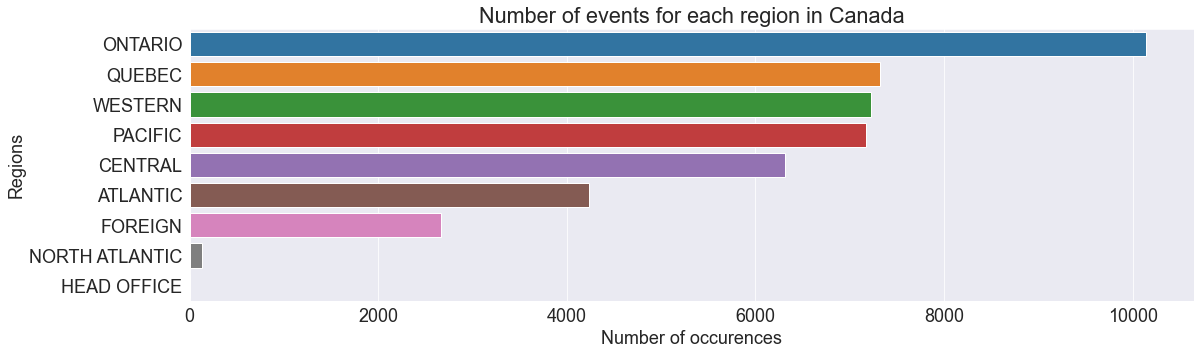

In [9]:
matplotlib.rcParams['figure.figsize'] = (18, 5)
column = 'OccRegionID_DisplayEng'
graph =  occurence_df.groupby(column)['OccNo'].count().sort_values(ascending=False)
fig = sns.barplot(graph.values, graph.index);
fig.set(xlabel = 'Number of occurences', ylabel = 'Regions', Title='Number of events for each region in Canada');

**ONTARIO** shows more events than the remaining regions. This is mainly due to the higher traffic density in this province. **FOREIGN** region refers to occurrences that happened outside Canada, involving canadian aircraft (manufactured, operated, etc). Let's have a look at the countries affected by these occurrences :

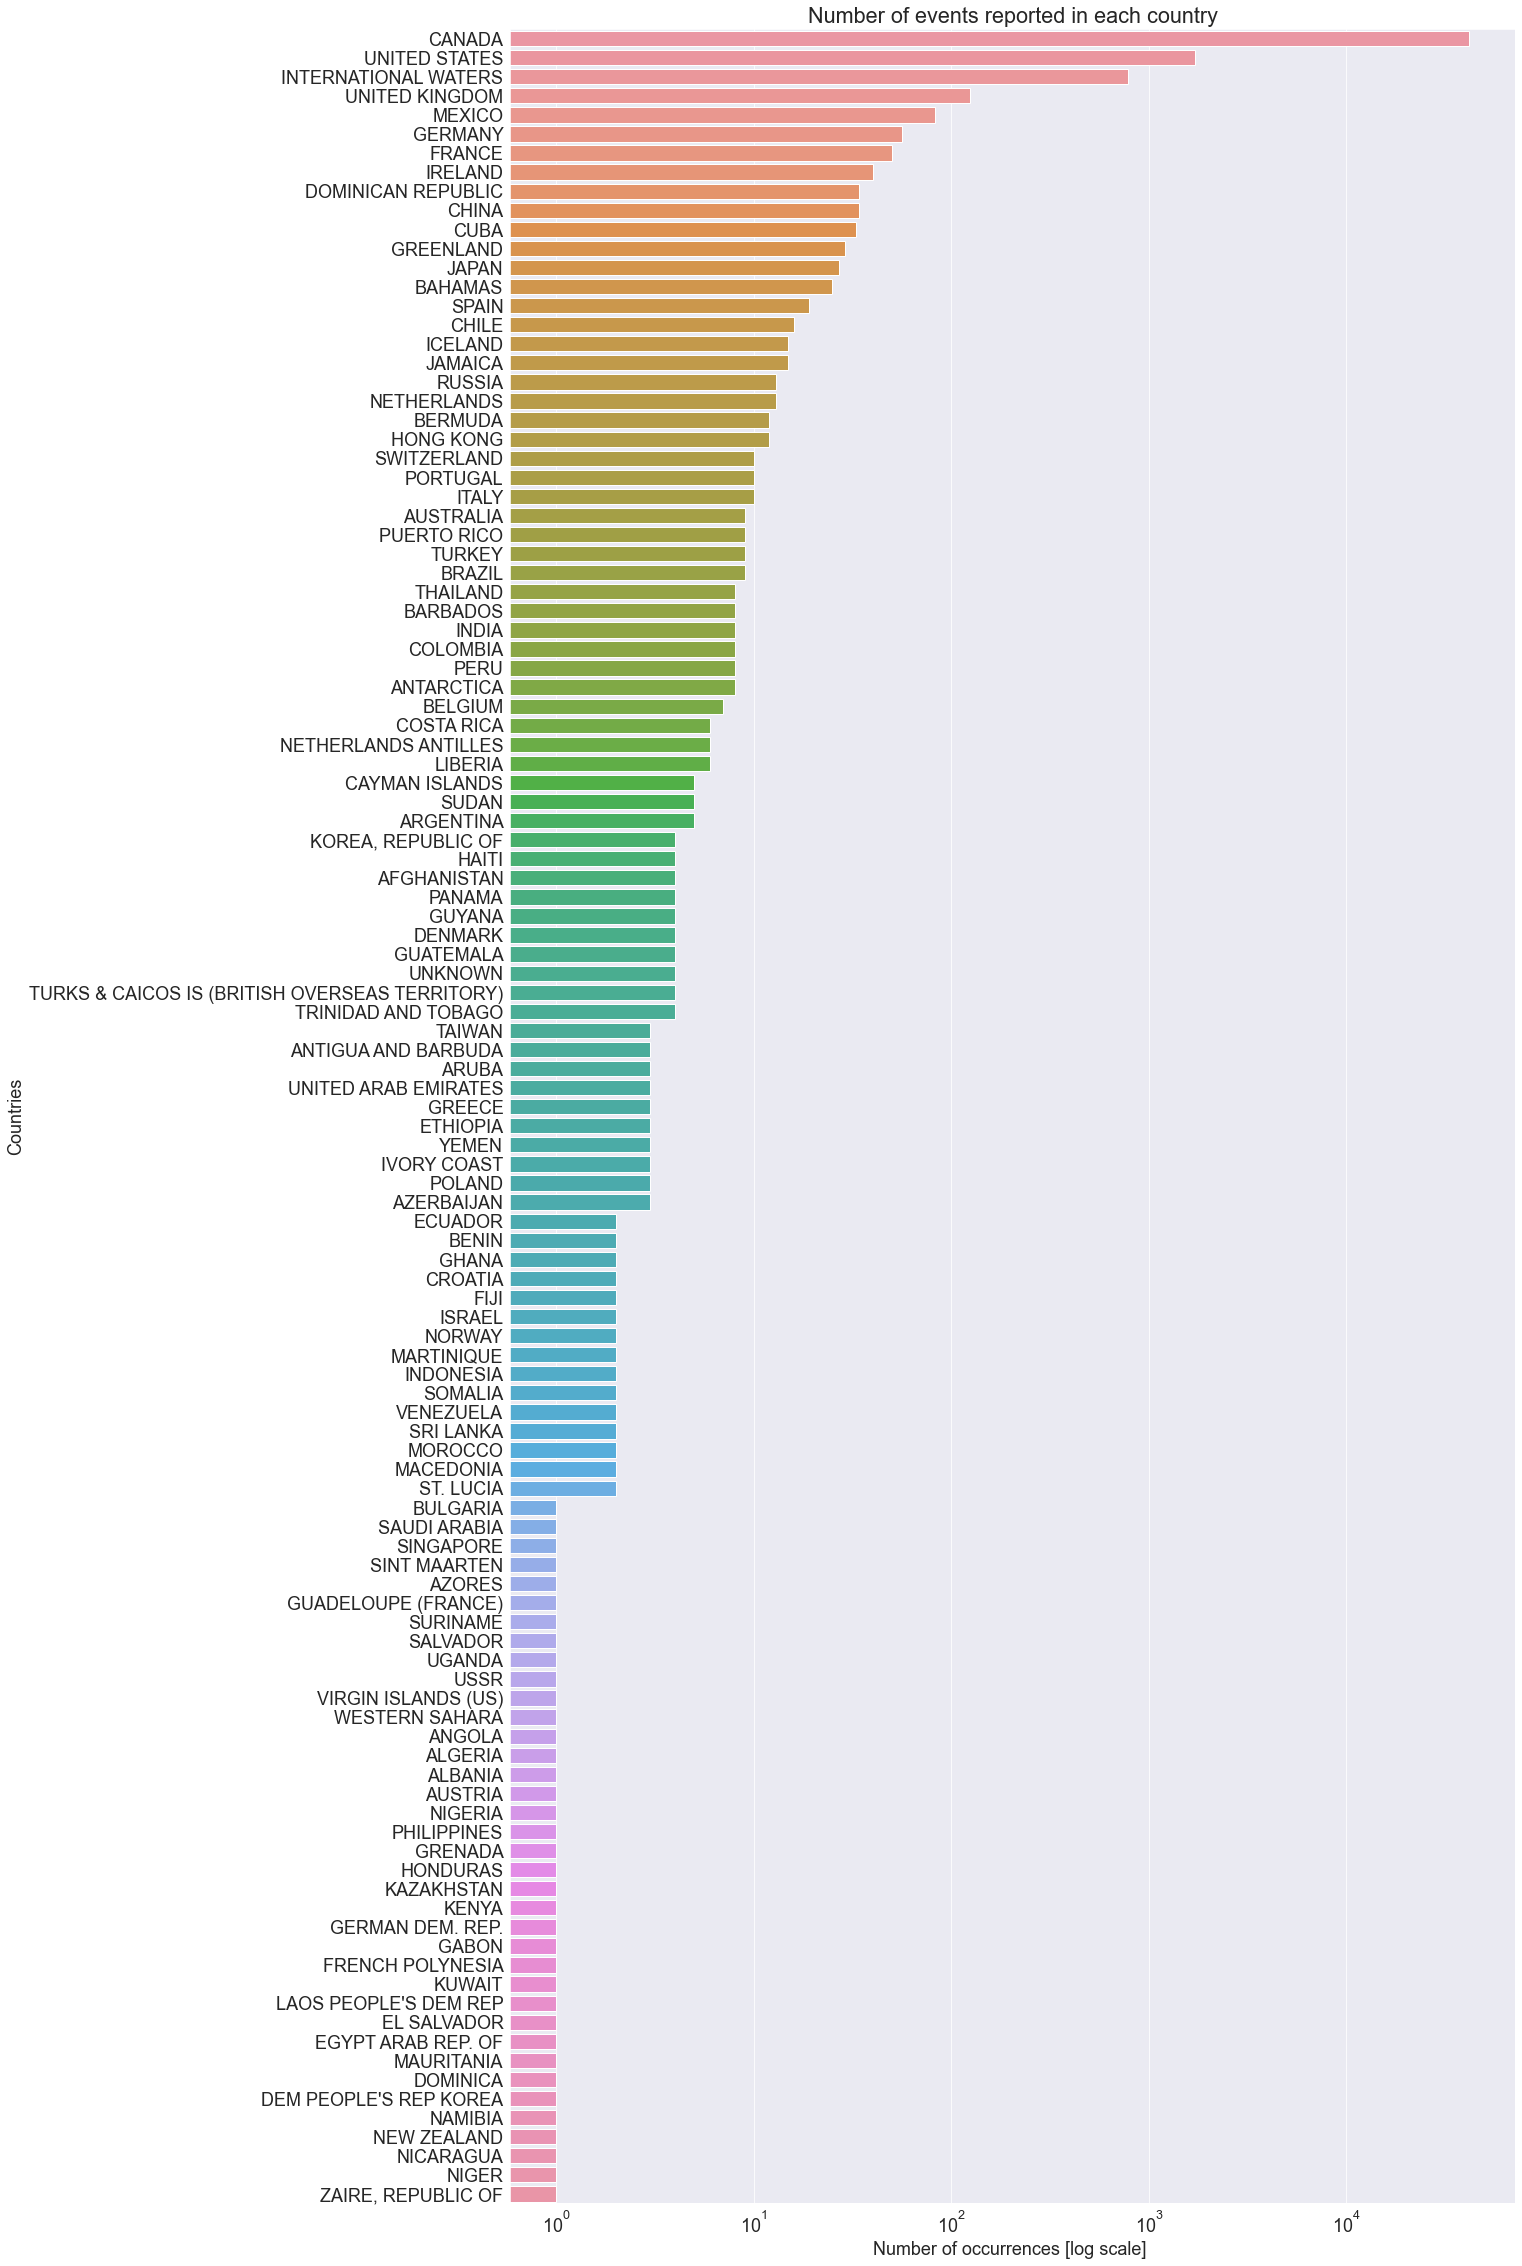

In [10]:
matplotlib.rcParams['figure.figsize'] = (18, 40)
column = 'CountryID_DisplayEng'
graph =  occurence_df.groupby(column)['OccNo'].count().sort_values(ascending=False)
fig = sns.barplot(graph.values, graph.index);
fig.set_xscale('log')
fig.set(xlabel = 'Number of occurrences [log scale] ', ylabel = 'Countries', Title='Number of events reported in each country');

In [11]:
canada_count = occurence_df[occurence_df[column]=='CANADA']['OccNo'].count()
total_count = occurence_df['OccNo'].count()
print('{} events happend in Canada. Total number is {}.'.format(canada_count, total_count))

41803 events happend in Canada. Total number is 45244.


Most of the events (92.34%) happened in Canada.  
Each event is categorized, according to its main cause. The following plot shows the breakdown of events :

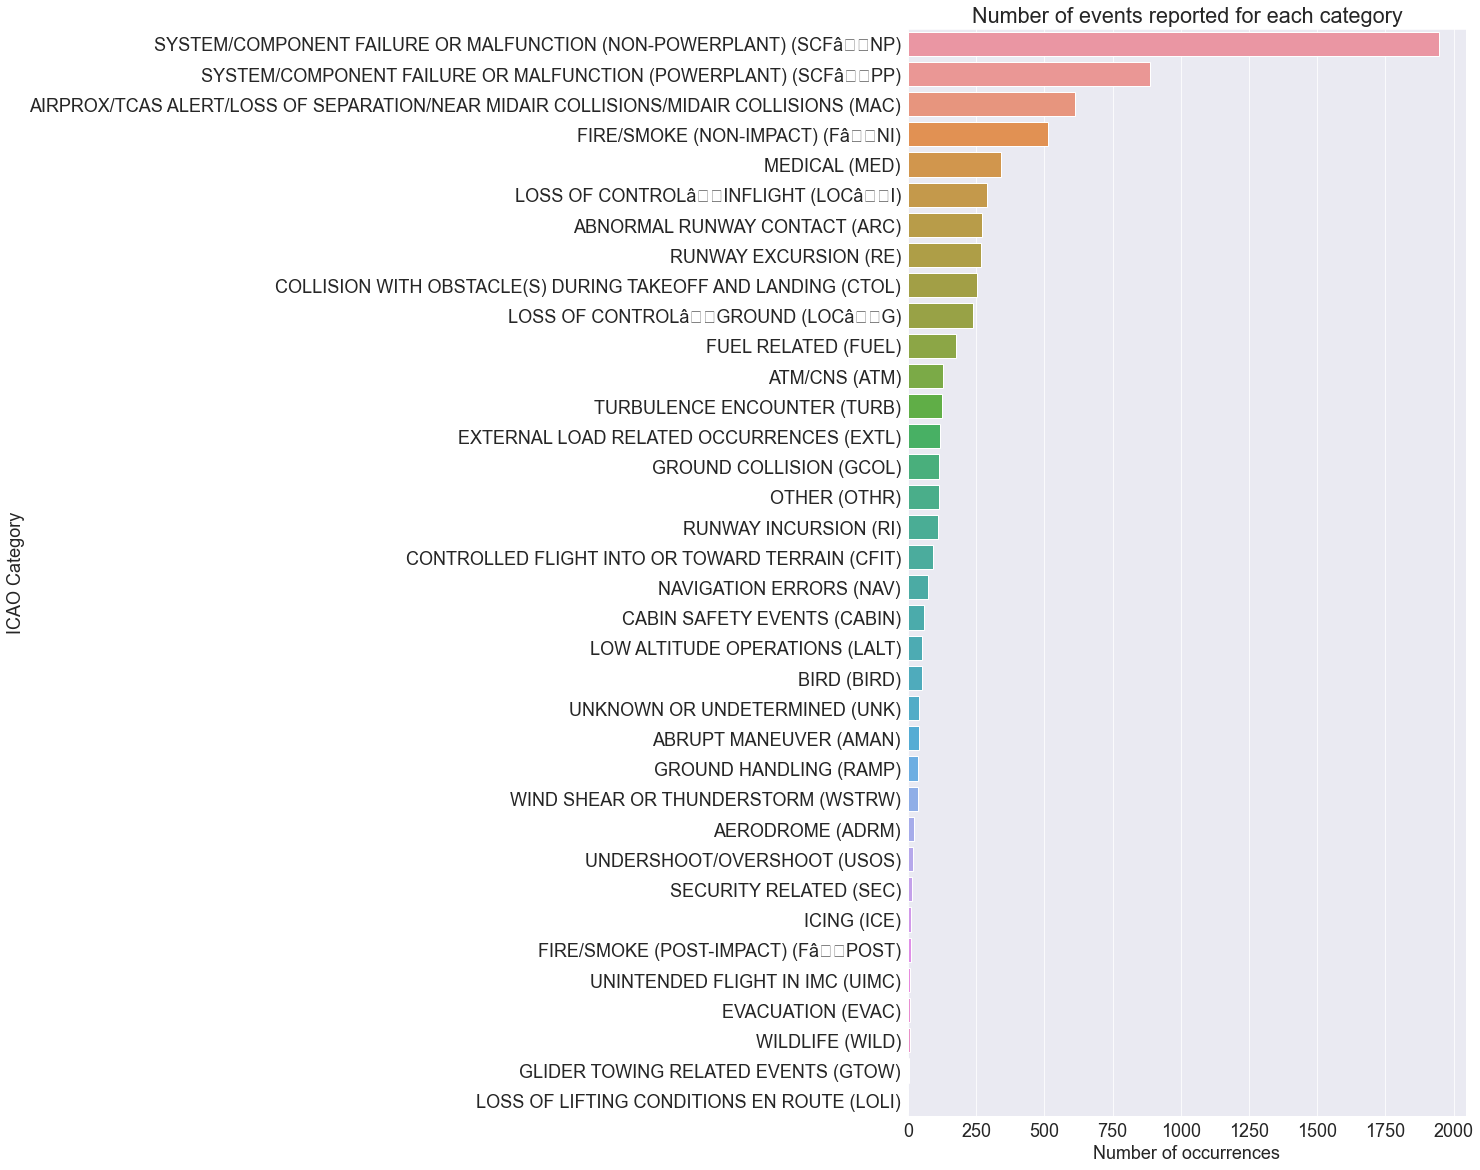

In [12]:
matplotlib.rcParams['figure.figsize'] = (10, 20)
column = 'ICAO_DisplayEng'
graph =  occurence_df_full.groupby(column)['OccNo'].count().sort_values(ascending=False)
fig = sns.barplot(graph.values, graph.index);
fig.set(xlabel = 'Number of occurrences', ylabel = 'ICAO Category', Title='Number of events reported for each category');

Here is a breakdown of occurrence categories:

In [13]:
print('Events categories (%)\n',graph.head(10)/graph.sum()*100)

Events categories (%)
 ICAO_DisplayEng
SYSTEM/COMPONENT FAILURE OR MALFUNCTION (NON-POWERPLANT) (SCFâNP)                     27.448218
SYSTEM/COMPONENT FAILURE OR MALFUNCTION (POWERPLANT) (SCFâPP)                         12.498239
AIRPROX/TCAS ALERT/LOSS OF SEPARATION/NEAR MIDAIR COLLISIONS/MIDAIR COLLISIONS (MAC)     8.651543
FIRE/SMOKE (NON-IMPACT) (FâNI)                                                         7.242497
MEDICAL (MED)                                                                            4.804847
LOSS OF CONTROLâINFLIGHT (LOCâI)                                                     4.072143
ABNORMAL RUNWAY CONTACT (ARC)                                                            3.804424
RUNWAY EXCURSION (RE)                                                                    3.762153
COLLISION WITH OBSTACLE(S) DURING TAKEOFF AND LANDING (CTOL)                             3.564887
LOSS OF CONTROLâGROUND (LOCâG)                                             

System failures (related or not to engines) are the most common categories of occurences. Those numbers must be considered with caution. The incident category data misses a lot of records:

In [14]:
print(occurence_df_full['ICAO_DisplayEng'].isna().sum(),'missing records out of 45000.')

41702 missing records out of 45000.


Date information requires some manipulation in order to extract intereting data.

In [15]:
occurence_df['OccDate'] = pd.to_datetime(occurence_df['OccDate'])
occurence_df['OccYear'] = occurence_df['OccDate'].dt.year
occurence_df['OccMonth'] = occurence_df['OccDate'].dt.month
occurence_df['OccWeekday'] = occurence_df['OccDate'].dt.weekday

The first plot, regarding occurrences dates, will show the number of events reported every year.

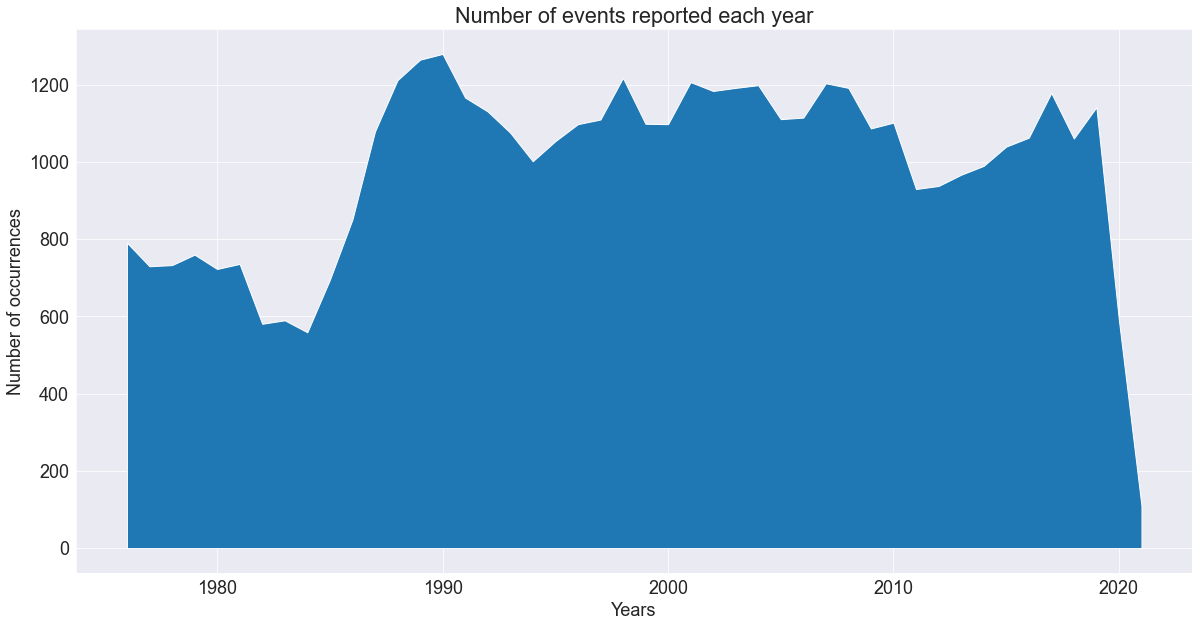

In [16]:
matplotlib.rcParams['figure.figsize'] = (20, 10)
column = 'OccYear'
data = occurence_df[occurence_df[column]>1965].dropna(subset=[column])
data2= data.groupby(column)['OccNo'].count()
plt.fill_between(data2.index, data2.values);
plt.xlabel('Years');
plt.ylabel('Number of occurrences');
plt.title('Number of events reported each year');


We have excluded events prior to 1965. The number of reported events was very low during these years. The number of occurrences seems to be steady since the 90s. An interesting comparison would include the total number of aircraft movements. Using [Statcan website](https://www150.statcan.gc.ca/t1/tbl1/en/tv.action?pid=2310000201&pickMembers%5B0%5D=2.1&pickMembers%5B1%5D=4.2&cubeTimeFrame.startMonth=01&cubeTimeFrame.startYear=1997&cubeTimeFrame.endMonth=04&cubeTimeFrame.endYear=2021&referencePeriods=19970101%2C20210401), we can observe that overall traffic is not increasing (at least since 1997, if we exclude 2020 and 2021 due to covid-19 crisis). 

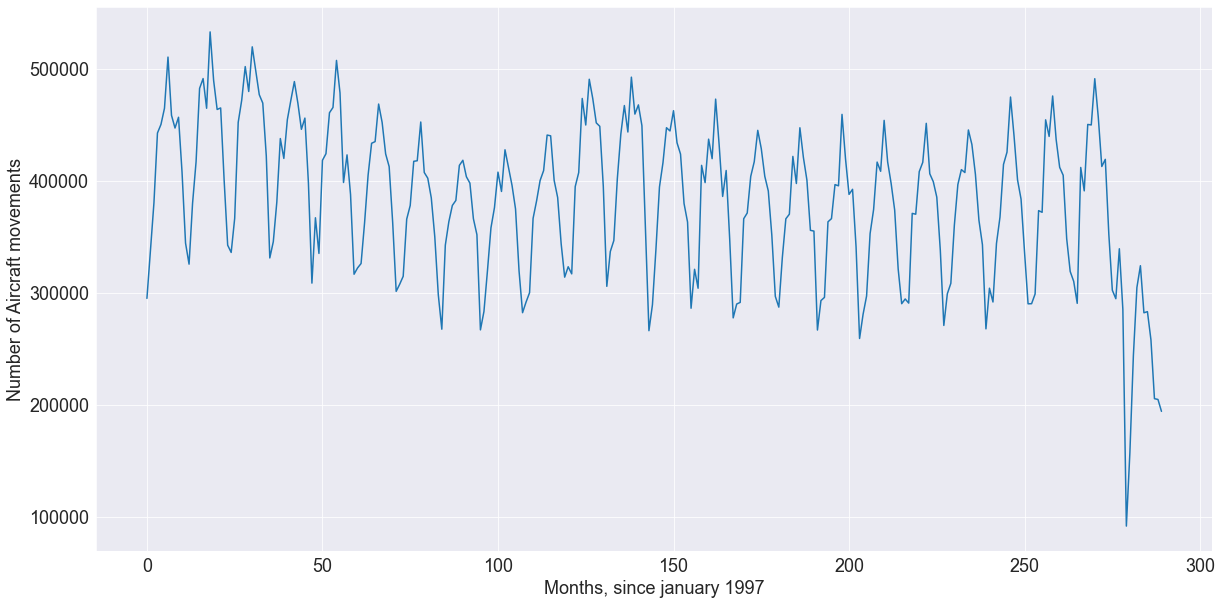

In [17]:
total_traffic_per_month = [295073,337146,380552,442854,450516,464973,510697,458663,447297,456912,407902,344482,325659,380045,417183,482710,491502,464962,533190,489821,463890,465243,400306,342608,336128,366646,452346,472217,502205,479946,519847,498412,477100,469594,422355,331220,345760,381111,437902,420143,454782,472125,488821,469541,446128,456177,398326,308714,367114,335254,418483,424343,460960,465684,507708,478667,398620,423309,387907,316658,322265,326231,362693,405125,433683,435156,468725,452305,424170,412831,363115,301364,307702,314836,365905,378116,417552,418059,452675,407577,402467,384931,350045,298217,267541,342664,363529,378121,382597,413927,418497,403773,398083,366234,352016,266931,283328,319662,358132,376230,407889,390620,427859,411896,396070,374974,319636,282289,291797,300182,366577,382264,400425,409285,441021,440333,400522,385201,343793,314044,323338,316990,394955,407534,473718,449994,490882,473606,451913,448830,395144,305836,336956,346748,402155,442058,467391,443741,492754,459748,467978,449438,358436,266203,289420,339228,394607,416342,447574,444682,462781,434142,423997,379867,363273,286269,321061,304147,413944,398521,437358,419919,473132,432291,386163,409364,348383,277661,290037,291483,366283,371370,404122,417210,445231,428915,404187,391091,351734,296863,287259,331536,366189,370297,421938,397728,447536,421029,400788,355873,355214,266787,293116,295953,363491,366338,396742,395670,459494,419687,387989,392543,341189,259238,280830,297214,352957,374535,416872,408643,454126,416991,397643,374009,321259,290319,294544,290853,371033,370288,408358,416629,451495,406442,399377,385502,338086,270894,299222,308524,360373,396811,410145,407532,445571,432552,405965,364946,343035,267840,304166,291847,344150,367705,414790,425777,474985,440303,400950,383760,336210,290225,290320,298983,373493,371989,454638,439791,475931,436955,412189,405096,348431,319111,310268,290654,412066,391156,450495,450060,491377,456956,412919,419319,352500,302368,294785,339424,285335,91600,157118,244049,304795,324274,282202,283235,258053,205465,204773,194127]
plt.plot(total_traffic_per_month);
plt.xlabel('Months, since january 1997');
plt.ylabel('Number of Aircraft movements');

Note that this graph shows the number of movements at airports, and not the number of passengers. Using the two plots, we can observe that the number of events is somewhat constant with regard to traffic density.  
  
    
The following plot tries to answer the question : are there periods of the year where more events occure ?

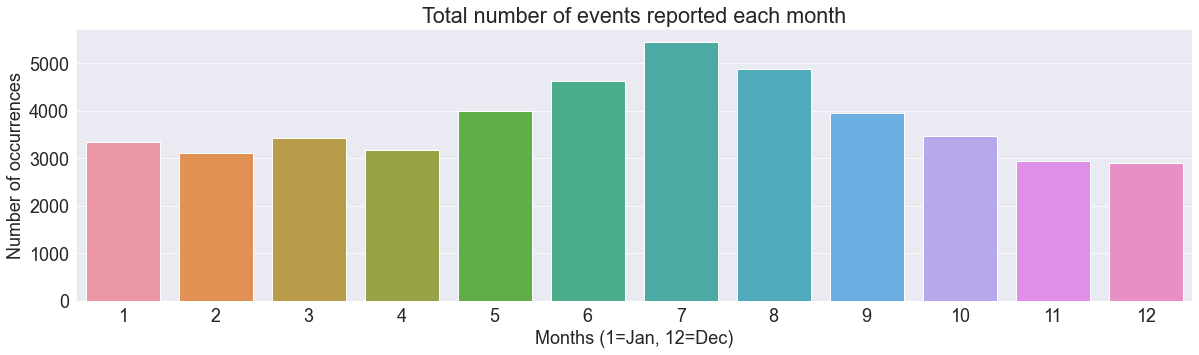

In [18]:
matplotlib.rcParams['figure.figsize'] = (20, 5)
column = 'OccMonth'
fig = sns.countplot(x=column, data = occurence_df.dropna(subset=[column]));
fig.set(xlabel = 'Months (1=Jan, 12=Dec)', ylabel = 'Number of occurrences', Title='Total number of events reported each month');

And the answer is Yes! It appears that summer months (5,6,7,8) are more affected by occurrences. This can be associated to the high density of traffic during summer. The previous graph confirms this cyclical pattern of traffic.  
Can we have similar results if we consider weekdays ?

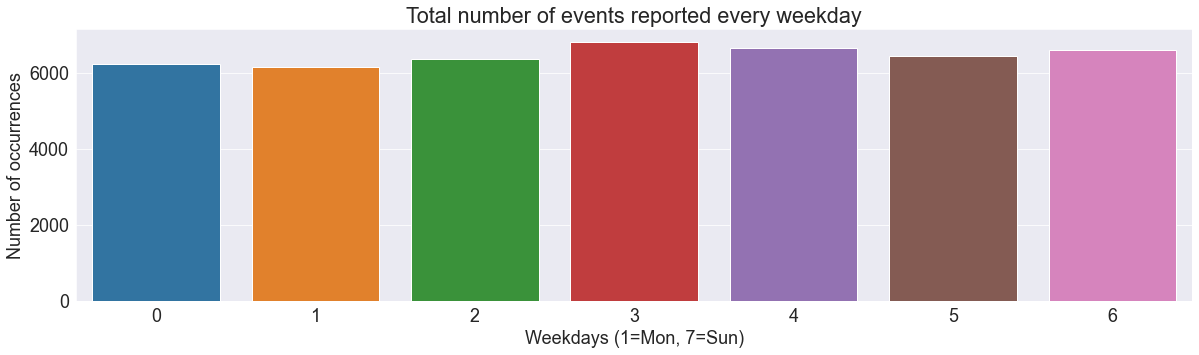

In [19]:
matplotlib.rcParams['figure.figsize'] = (20, 5)
column = 'OccWeekday'
fig = sns.countplot(x=column, data = occurence_df.dropna(subset=[column]));
fig.set(xlabel = 'Weekdays (1=Mon, 7=Sun)', ylabel = 'Number of occurrences', Title='Total number of events reported every weekday');

The result shows that there is almost no correlation between the number of events and weekdays.  
  
Next, we look at the incident type breakdown (as defined by Transportation Safety Board).

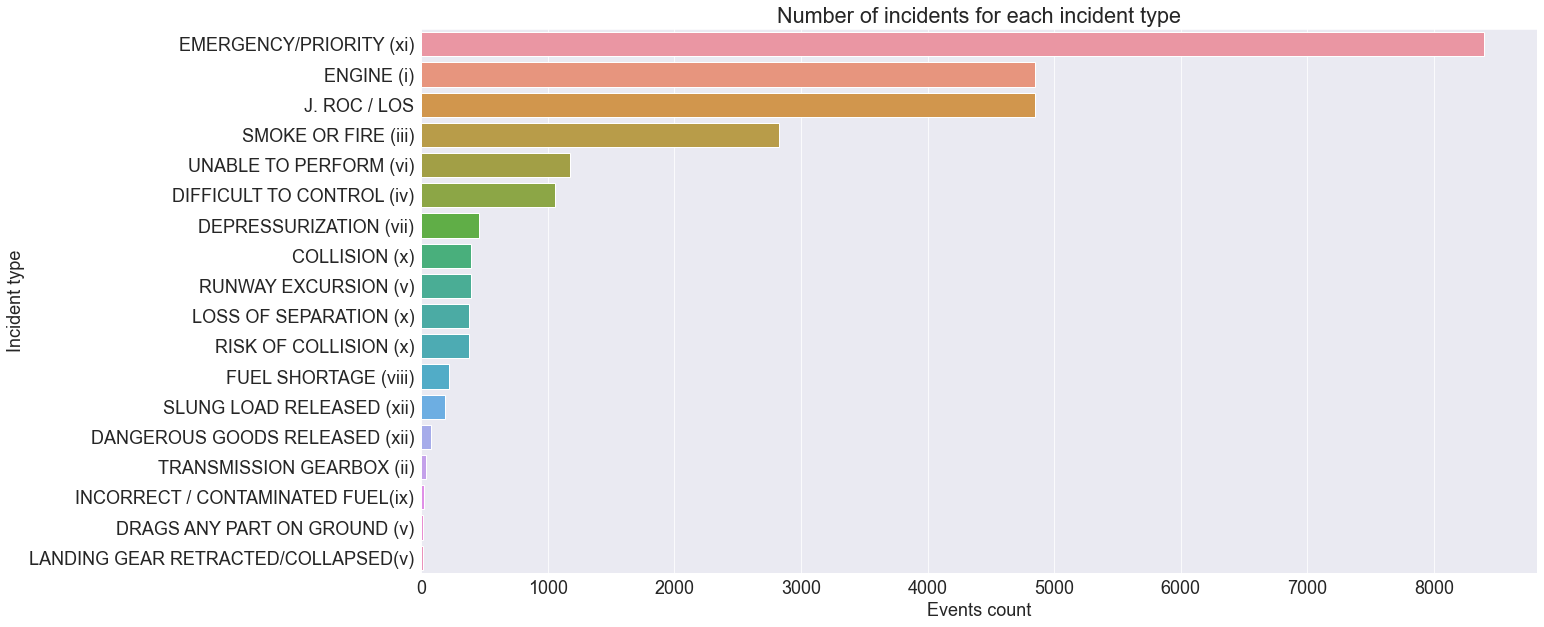

In [20]:
matplotlib.rcParams['figure.figsize'] = (20, 10)
column = 'OccIncidentTypeID_DisplayEng'
graph =  occurence_df.groupby(column)['OccNo'].count().sort_values(ascending=False)
fig = sns.barplot(graph.values, graph.index);
fig.set(xlabel = 'Events count', ylabel = 'Incident type', Title='Number of incidents for each incident type');

In contrast to the incident category used in a previous plot, this column is missing less data.

In [21]:
print(occurence_df_full['OccIncidentTypeID_DisplayEng'].isna().sum(),'missing records out of 45000.')

22381 missing records out of 45000.


This is still close to 50% of missing data. Nonetheless, 22381 records show that emergencies are the top category of incidents.  
  
In aviation, time is usually provided in UTC (GMT) standard format. Because of the large area of Canada, this information cannot give an intuition about the time of day. In our dataset, some of the events are not reported in UTC time. Let's take a look at the breakdown of occurrences.

In [22]:
occurence_df['OccTime'] = pd.to_datetime(occurence_df['OccTime'])
occurence_df['OccHour'] = occurence_df['OccTime'].dt.hour
occurence_df['OccMinute'] = occurence_df['OccTime'].dt.minute

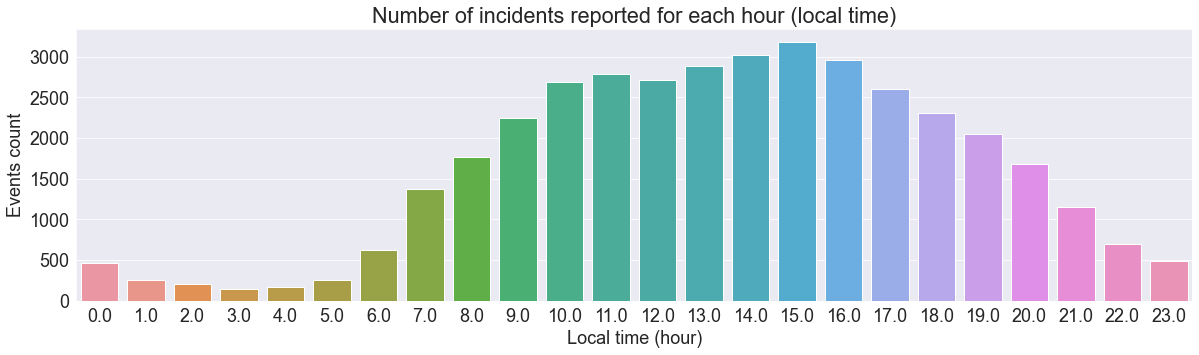

In [23]:
matplotlib.rcParams['figure.figsize'] = (20, 5)
column = 'OccHour'
fig = sns.countplot(x=column, data = occurence_df[occurence_df['TimeZoneID_DisplayEng'] !='UTC'].dropna(subset=[column]));
fig.set(xlabel = 'Local time (hour)', ylabel = 'Events count', Title='Number of incidents reported for each hour (local time)');

It comes out that most occurrences happen during daytime. Obviously, traffic density during day is higher, and the risk of incident increases.  
Next, we look at the incident/accident breakdown.

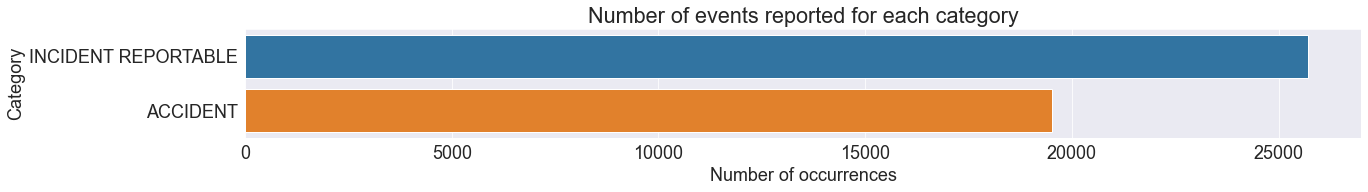

In [24]:
matplotlib.rcParams['figure.figsize'] = (20, 2)
column = 'OccTypeID_DisplayEng'
fig = sns.countplot(y=column, data = occurence_df.dropna(subset=[column]));
fig.set(xlabel = 'Number of occurrences', ylabel = 'Category', Title='Number of events reported for each category');

Statistically, there are more incidents (not involving fatal injuries, or aircraft damage) than accidents. With that being said, about 40% of events are categorized as accidents. Let's see if this rate is changing with time.

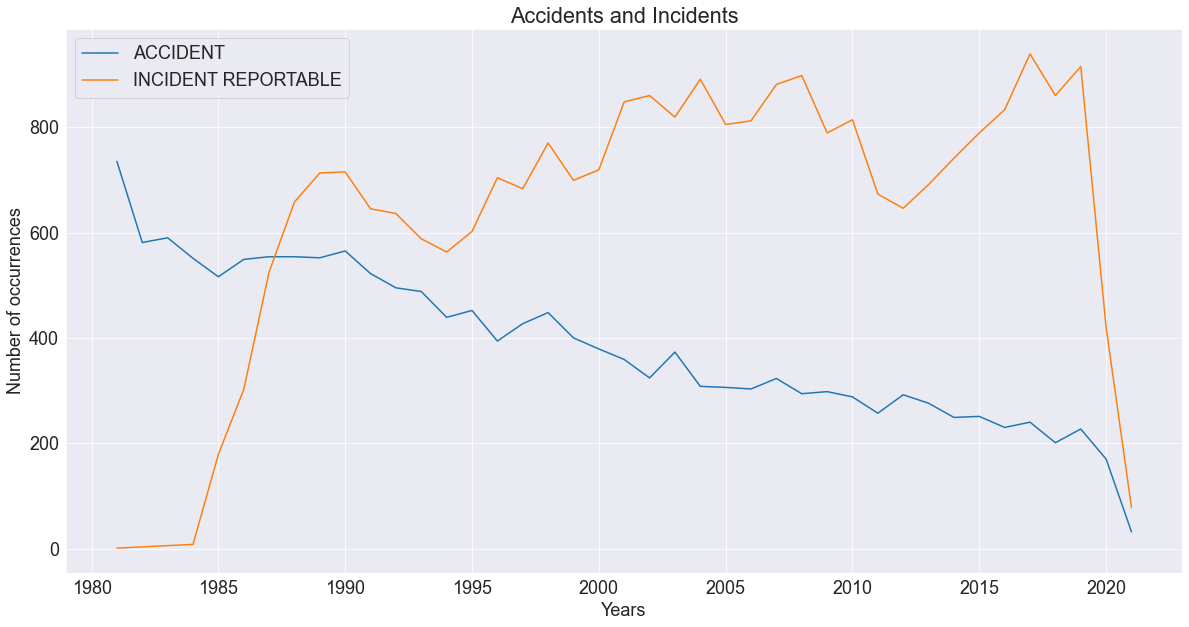

In [25]:
matplotlib.rcParams['figure.figsize'] = (20, 10)
column = 'OccYear'
sub_occ1 = occurence_df[occurence_df['OccTypeID_DisplayEng']=='ACCIDENT']
sub_occ2 = occurence_df[occurence_df['OccTypeID_DisplayEng']=='INCIDENT REPORTABLE']

data = sub_occ1[sub_occ1[column]>1980].dropna(subset=[column])
data2 = data.groupby(column)['OccNo'].count()

data3 = sub_occ2[sub_occ2[column]>1980].dropna(subset=[column])
data4 = data3.groupby(column)['OccNo'].count()

plt.plot(data2.index, data2.values, label='ACCIDENT');
plt.plot(data4.index, data4.values, label = 'INCIDENT REPORTABLE');

plt.xlabel('Years');
plt.ylabel('Number of occurrences');
plt.title('Accidents and Incidents');
plt.legend();

The result is encouraging! the rate of accidents among the reported events is decreasing. This means that there are less fatal injuries and substantial damages.  
  
In Canada, aviation occurences are reported by multiple agencies/individuals. Let's plot the breakdown of data sources. 

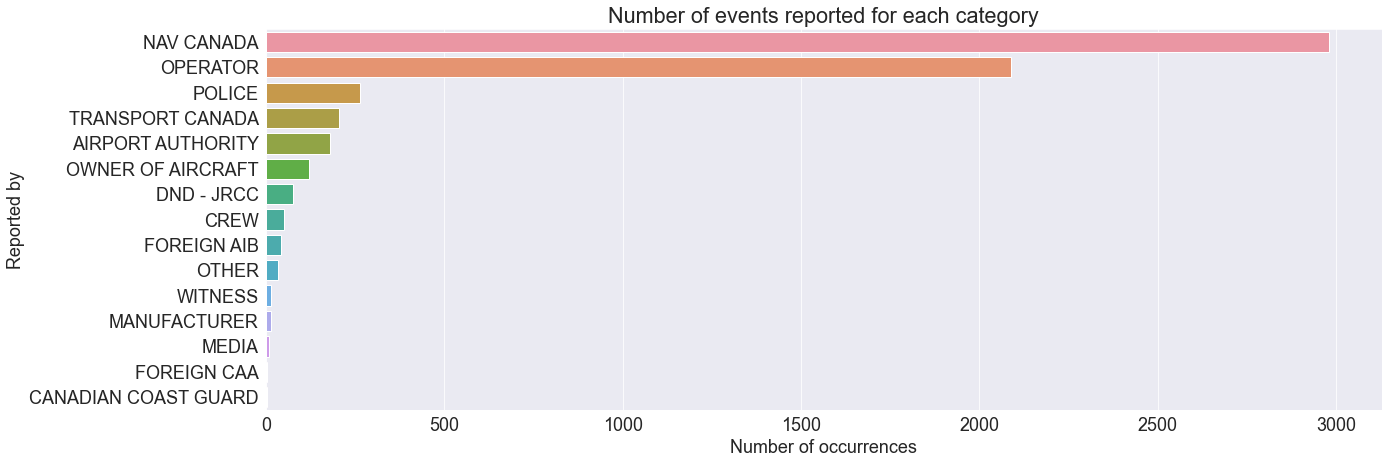

In [26]:
matplotlib.rcParams['figure.figsize'] = (20, 7)
column = 'ReportedByID_DisplayEng'
graph =  occurence_df[occurence_df[column]!='UNKNOWN'].groupby(column)['OccNo'].count().sort_values(ascending=False)
fig = sns.barplot(graph.values, graph.index);
fig.set(xlabel = 'Number of occurrences', ylabel = 'Reported by', Title='Number of events reported for each category');

First, we observe that this column is missing a lot of data. Based on the available records, it turns out that Nav Canada and operators have reported most of occurrences.  
In the introduction, we stated that some incidents can be classified as *serious* incidents if an accident nearly occurred. This information is available in the dataset.

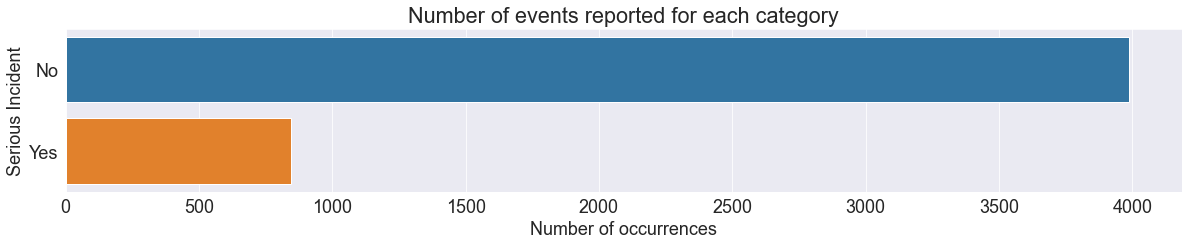

In [27]:
matplotlib.rcParams['figure.figsize'] = (20, 3)
column = 'SeriousIncidentEnum_DisplayEng'
graph =  occurence_df[occurence_df[column]!='Unknown'].groupby(column)['OccNo'].count().sort_values(ascending=False)
fig = sns.barplot(graph.values, graph.index);
fig.set(xlabel = 'Number of occurrences', ylabel = 'Serious Incident', Title='Number of events reported for each category');

This column is almost empty (90% of rows are missing). We couldn't base any analysis on this data.  
In the next plot, we display the total number of fatal injuries, reported each year since 1965.

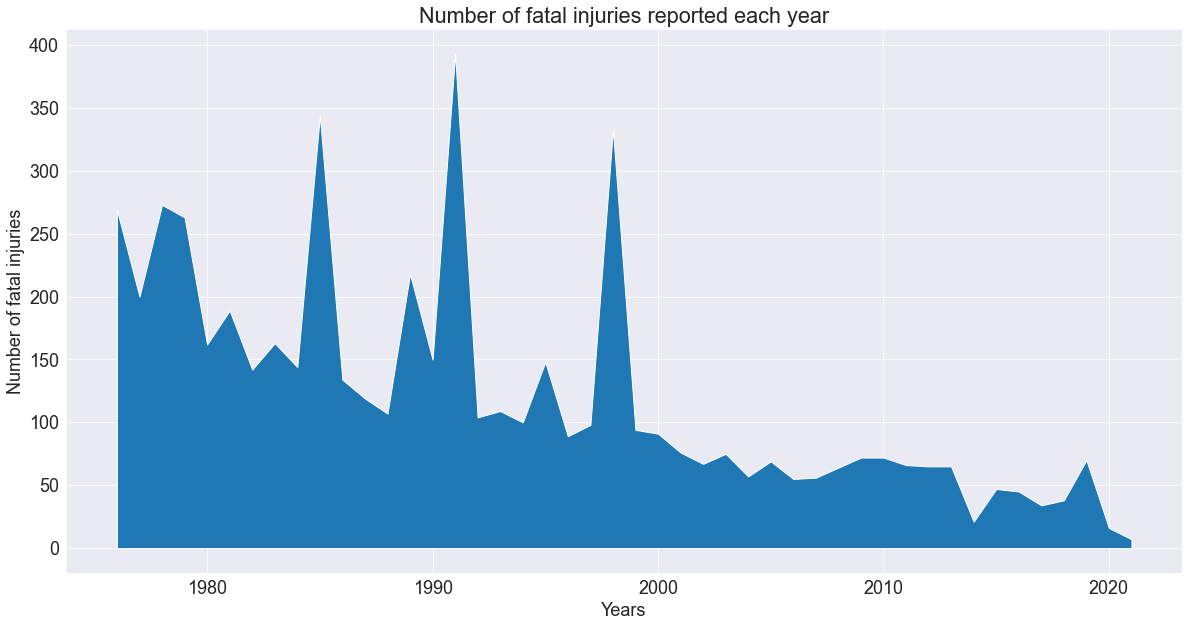

In [28]:
matplotlib.rcParams['figure.figsize'] = (20, 10)
column = 'OccYear'
data = occurence_df[occurence_df[column]>1965].dropna(subset=[column])
data2= data.groupby(column)['TotalFatalCount'].sum()
plt.fill_between(data2.index, data2.values);
plt.xlabel('Years');
plt.ylabel('Number of fatal injuries');
plt.title('Number of fatal injuries reported each year');

The general trend is downward (which is good news). There are still some peaks in this graph that need further investigation. One hypothesis is that those values are related to crashes that caused a lot of deaths. Let's look for these events:

In [29]:
# 10 worst accidents, by death count
data = occurence_df.sort_values('TotalFatalCount',ascending=False)[['OccDate','TotalFatalCount','OccNo','CountryID_DisplayEng']].head(10)
OccNos = data['OccNo'].values
print(list(data.columns),'[AircraftModelID_DisplayEng','OrganizationID_DisplayEng]')
for OccNo in OccNos:
    print(data[data['OccNo']==OccNo].values, aircraft_df[aircraft_df['OccNo']==OccNo][['AircraftModelID_DisplayEng','OrganizationID_DisplayEng']].values)

['OccDate', 'TotalFatalCount', 'OccNo', 'CountryID_DisplayEng'] [AircraftModelID_DisplayEng OrganizationID_DisplayEng]
[[Timestamp('1991-07-11 00:00:00') 261 'A91F0011' 'SAUDI ARABIA']] [['DC-8-61' 'NATIONAIR (NOLISAIR)']]
[[Timestamp('1985-12-12 00:00:00') 256 'A85H0902' 'CANADA']] [['DC-8-63' 'ARROW AIR']]
[[Timestamp('1998-09-02 00:00:00') 229 'A98H0003' 'CANADA']] [['MD-11' 'SWISSAIR']]
[[Timestamp('1976-01-01 00:00:00') 62 'A76P7962' 'CANADA']] [['DC-4M2' nan]]
[[Timestamp('1989-09-08 00:00:00') 55 'A89H0011' 'DENMARK']] [['CV580' 'PARTNAIR']]
[[Timestamp('1978-02-11 00:00:00') 43 'A78H0001' 'CANADA']] [['737-200' 'PACIFIC WESTERN AIRLINES']]
[[Timestamp('1989-03-10 00:00:00') 24 'A89C0048' 'CANADA']] [['F-28 MK 1000' 'AIR ONTARIO']]
[[Timestamp('1983-06-02 00:00:00') 23 'A83F0006' 'UNITED STATES']] [['DC-9-32' 'AIR CANADA']]
[[Timestamp('1990-04-18 00:00:00') 20 'A90H0004' 'PANAMA']] [['DHC-6-200' 'AEROPERLAS S.A.']]
[[Timestamp('1990-09-11 00:00:00') 18 'A90A0214' 'INTERNATIONAL

Using this result, we can see that the top 3 accidents happened in 1985,1991 and 1998. These are the peaks in our graph. We can extract more details about these accidents.

In [30]:
### let's consider the top 3
fatal1 = occurence_df[occurence_df['OccYear']==1985]['TotalFatalCount'].max()
fatal2 = occurence_df[occurence_df['OccYear']==1991]['TotalFatalCount'].max()
fatal3 = occurence_df[occurence_df['OccYear']==1998]['TotalFatalCount'].max()
OccNo1 = occurence_df[occurence_df['TotalFatalCount']==fatal1]['OccNo']
OccNo2 = occurence_df[occurence_df['TotalFatalCount']==fatal2]['OccNo']
OccNo3 = occurence_df[occurence_df['TotalFatalCount']==fatal3]['OccNo']
event1 = occurence_df[occurence_df['OccNo']==OccNo1.values[0]]['Summary'].values[0]
event2 = occurence_df[occurence_df['OccNo']==OccNo2.values[0]]['Summary'].values[0]
event3 = occurence_df[occurence_df['OccNo']==OccNo3.values[0]]['Summary'].values[0]
aircraft1 = aircraft_df[aircraft_df['OccNo']==OccNo1.values[0]]['AircraftModelID_DisplayEng'].values[0]
aircraft2 = aircraft_df[aircraft_df['OccNo']==OccNo2.values[0]]['AircraftModelID_DisplayEng'].values[0]
aircraft3 = aircraft_df[aircraft_df['OccNo']==OccNo3.values[0]]['AircraftModelID_DisplayEng'].values[0]
date1 = occurence_df[occurence_df['OccNo']==OccNo1.values[0]]['OccDate'].values[0]
date2 = occurence_df[occurence_df['OccNo']==OccNo2.values[0]]['OccDate'].values[0]
date3 = occurence_df[occurence_df['OccNo']==OccNo3.values[0]]['OccDate'].values[0]

print('In {}. Event# {} Caused {} deaths. Aircraft type was {}'.format(str(date1)[:10],event1, fatal1,aircraft1))
print('\n')
print('In {}. Event# {} Caused {} deaths. Aircraft type was {}'.format(str(date2)[:10],event2, fatal2,aircraft2))
print('\n')
print('In {}. Event# {} Caused {} deaths. Aircraft type was {}'.format(str(date3)[:10],event3, fatal3,aircraft3))


In 1985-12-12. Event# A85H0902: AIRCRAFT CRASHED ON TAKE-OFF, APPROXIMATELY ONE-HALF MILE BEYOND THE DEPARTURE END OF RUNWAY 22. THE AIRCRAFT WAS DESTROYED BY IMPACT FORCES AND A POST-CRASH FIRE.      Caused 256 deaths. Aircraft type was DC-8-63


In 1991-07-11. Event# A91F0011: THE NATIONAR DC-8 WAS RETURNING TO LAND SHORTLY AFTER TAKE-OFF FROM KING ABDUL AZZIZ INTERNATIONAL AIRPORT IN SAUDI ARABIA AND CRASHED ABOUT ONE MILE ON FINAL APPROACH FOR RUNWAY 34C.  THE AIRCRAFT WAS DESTROYED IN THE CRASH AND THERE WERE NO SURVIVORS.THE PRESIDENCY OF CIVIL AVIATION OF SAUDI ARABIA IS CONDUCTING THE INVESTIGATION.  RON COLEMAN HAS BEEN APPOINTED CANADIAN ACCREDITED REPRESENTATIVE. Caused 261 deaths. Aircraft type was DC-8-61


In 1998-09-02. Event# A98H0003: At 0018 UTC, a Swissair MD-11 (SR 111) departed New York, USA, for Geneva, Switzerland, with 215 passengers and 14 crew members on board.  About 53 minutes after departure, the pilots detected an odour in the cockpit.  Within about three 

Those events can be considered as outliers. They affect the statistics of the dataset. For instance, here is a plot of average fatal injuries count for each month:

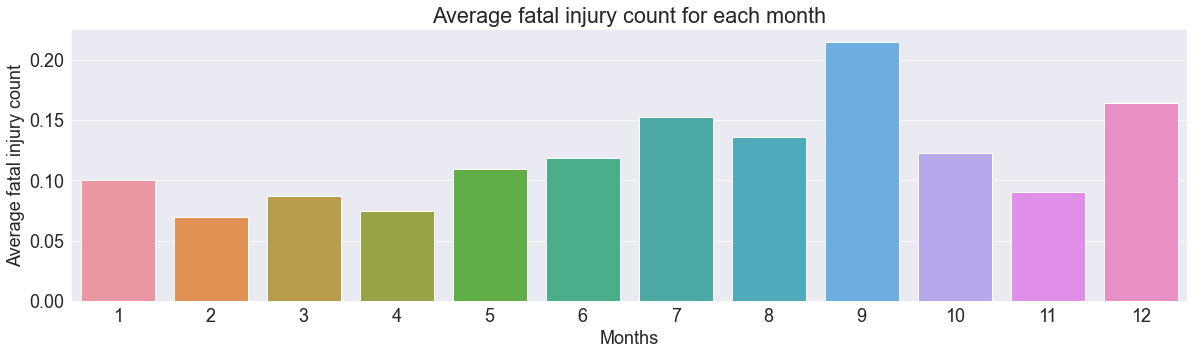

In [31]:
matplotlib.rcParams['figure.figsize'] = (20, 5)
data = occurence_df.groupby('OccMonth').TotalFatalCount.mean()
fig = sns.barplot(x = data.index, y = data.values);
fig.set(xlabel = 'Months', ylabel = 'Average fatal injury count', Title='Average fatal injury count for each month');

We can see clearly peaks in jully, september and december, where the three worst accidents happend.  
The same reasoning can be applied to serious injuries. The results are shown in the following plot: 

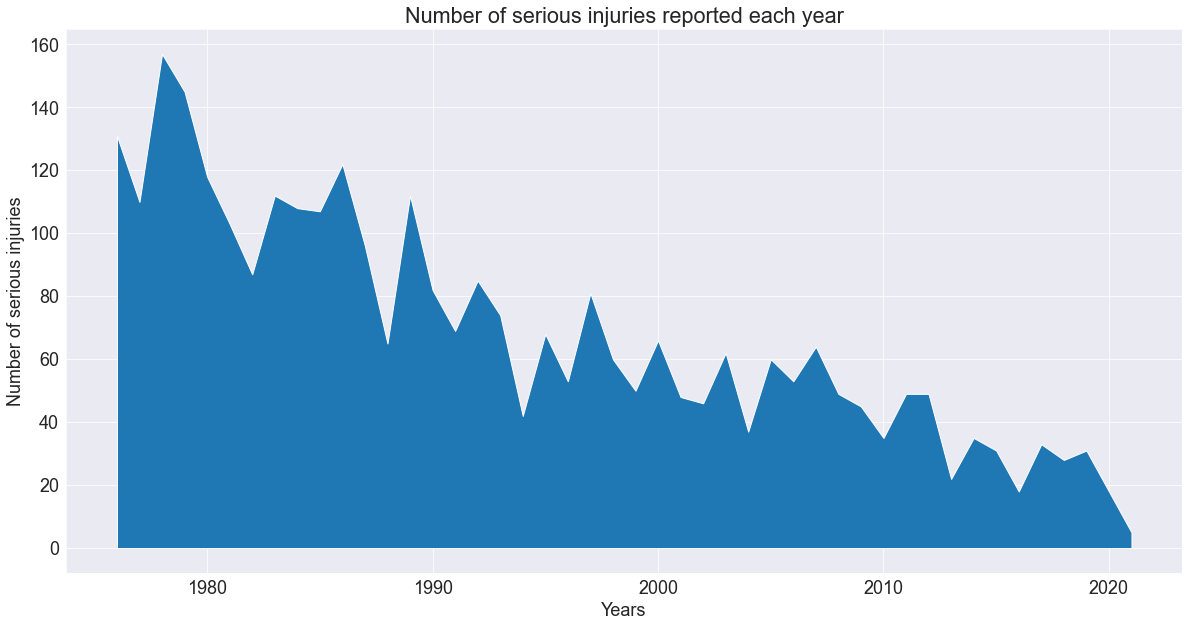

In [32]:
matplotlib.rcParams['figure.figsize'] = (20, 10)
column = 'OccYear'
data = occurence_df[occurence_df[column]>1965].dropna(subset=[column])
data2= data.groupby(column)['TotalSeriousCount'].sum()
plt.fill_between(data2.index, data2.values);
plt.xlabel('Years');
plt.ylabel('Number of serious injuries');
plt.title('Number of serious injuries reported each year');

The downward trend is also visible in this plot. New technologies, and new regulations are improving the safety of air travel!  
We found an interesting relationship between the average number of serious injuries and the weekdays. 

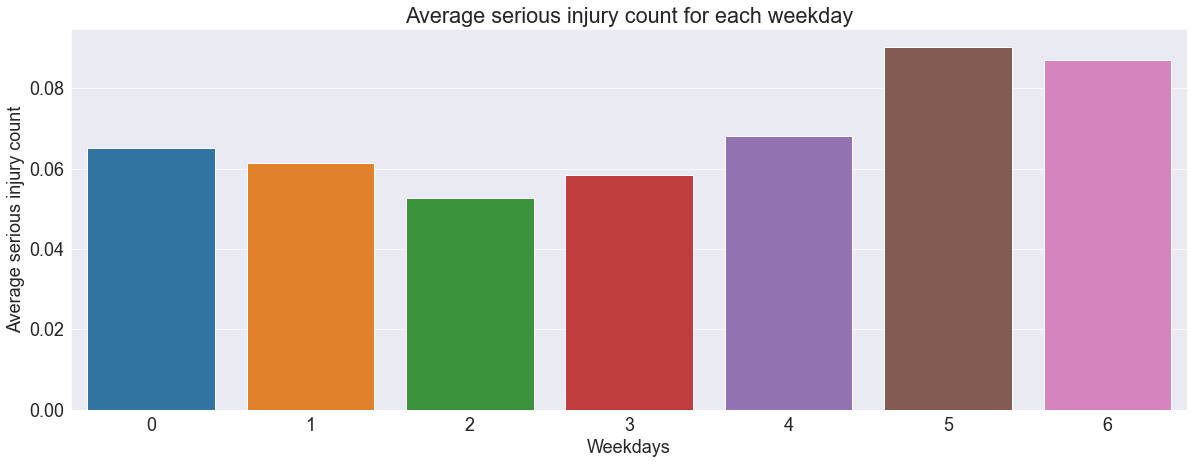

In [33]:
matplotlib.rcParams['figure.figsize'] = (20, 7)
data = occurence_df.groupby('OccWeekday').TotalSeriousCount.mean()
fig = sns.barplot(x = data.index, y = data.values);
fig.set(xlabel = 'Weekdays', ylabel = 'Average serious injury count', Title='Average serious injury count for each weekday');

It appears that more serious injuries happen on weekends. More investigation is required to determine the real reasons of such a trend. One hypothesis is that most amateur flights happen during weekends.  
The next plot, shows that most occurences are not associated with injuries:

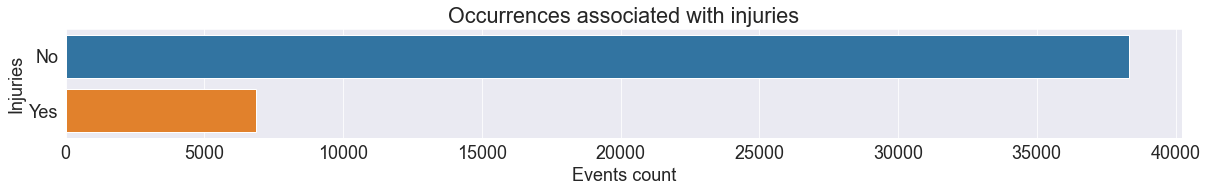

In [34]:
matplotlib.rcParams['figure.figsize'] = (20, 2)
column = 'InjuriesEnum_DisplayEng'
fig = sns.countplot(y=column, data = occurence_df[occurence_df[column]!='Unknown'].dropna(subset=[column]));
fig.set(xlabel = 'Events count', ylabel = 'Injuries', Title='Occurrences associated with injuries');

One question we may ask, is there a relationship between light conditions and the possibilty of aviation occurences ? let's see the next graph:

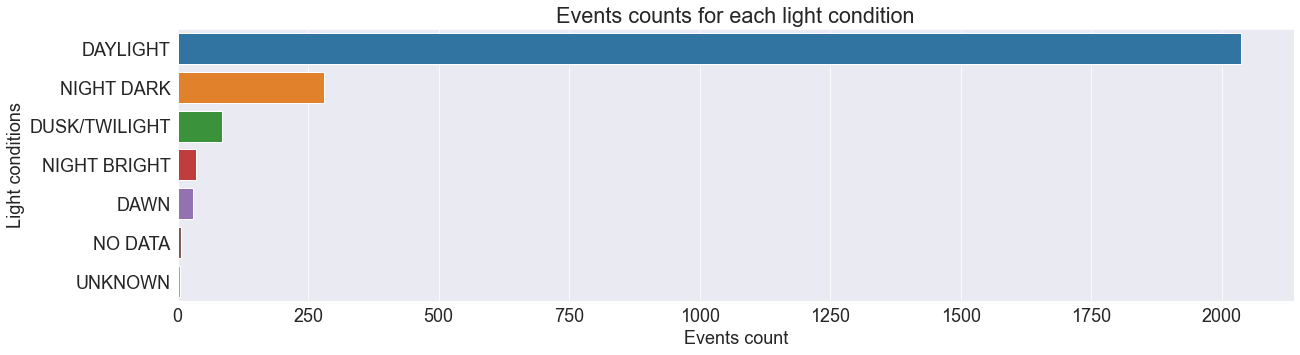

In [35]:
matplotlib.rcParams['figure.figsize'] = (20, 5)
column = 'LightCondID_DisplayEng'
graph =  occurence_df.groupby(column)['OccNo'].count().sort_values(ascending=False)
fig = sns.barplot(graph.values, graph.index);
fig.set(xlabel = 'Events count', ylabel = 'Light conditions', Title='Events counts for each light condition');


The data is missing most of the rows. Based on what is shown, most events occured during daylight.  
We plot a similar graph for sky conditions: 

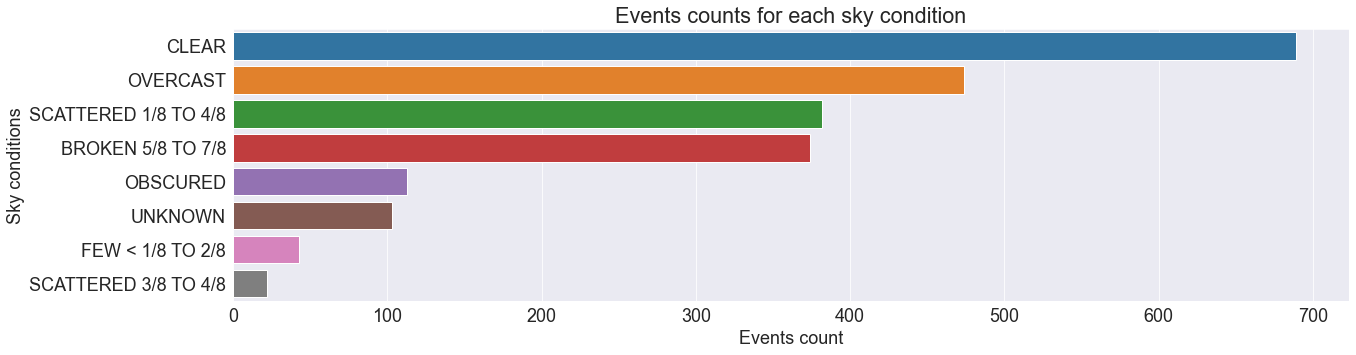

In [36]:
matplotlib.rcParams['figure.figsize'] = (20, 5)
column = 'SkyCondID_DisplayEng'
graph =  occurence_df.groupby(column)['OccNo'].count().sort_values(ascending=False)
fig = sns.barplot(graph.values, graph.index);
fig.set(xlabel = 'Events count', ylabel = 'Sky conditions', Title='Events counts for each sky condition');


Again, we are missing many rows here. It appears that in clear sky, occurrences are more likely to happen.  


Another weather-related parameter is the visual/instrument condition. This refers to visibility being above or less than 3 nautical miles. Definition can vary in other countries.

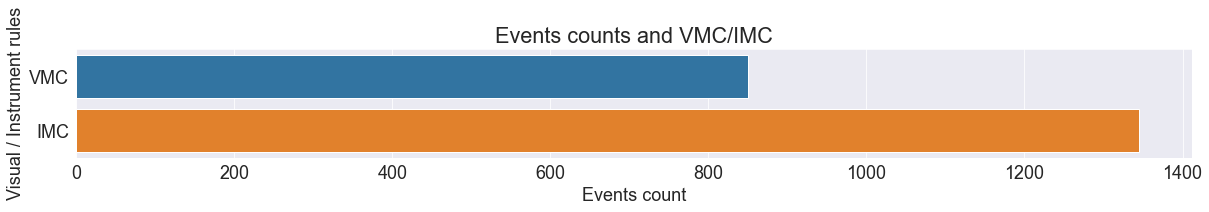

In [37]:
matplotlib.rcParams['figure.figsize'] = (20, 2)
column = 'GeneralWeatherID_DisplayEng'
fig= sns.countplot(y=column, data = occurence_df[occurence_df[column]!='UNKNOWN'].dropna(subset=[column]));
fig.set(xlabel = 'Events count', ylabel = 'Visual / Instrument rules', Title='Events counts and VMC/IMC');

In the next plot, we look for the relationship between the visibility ceiling (vertical visibility), visibility (horizontal visibility) and the number of events.

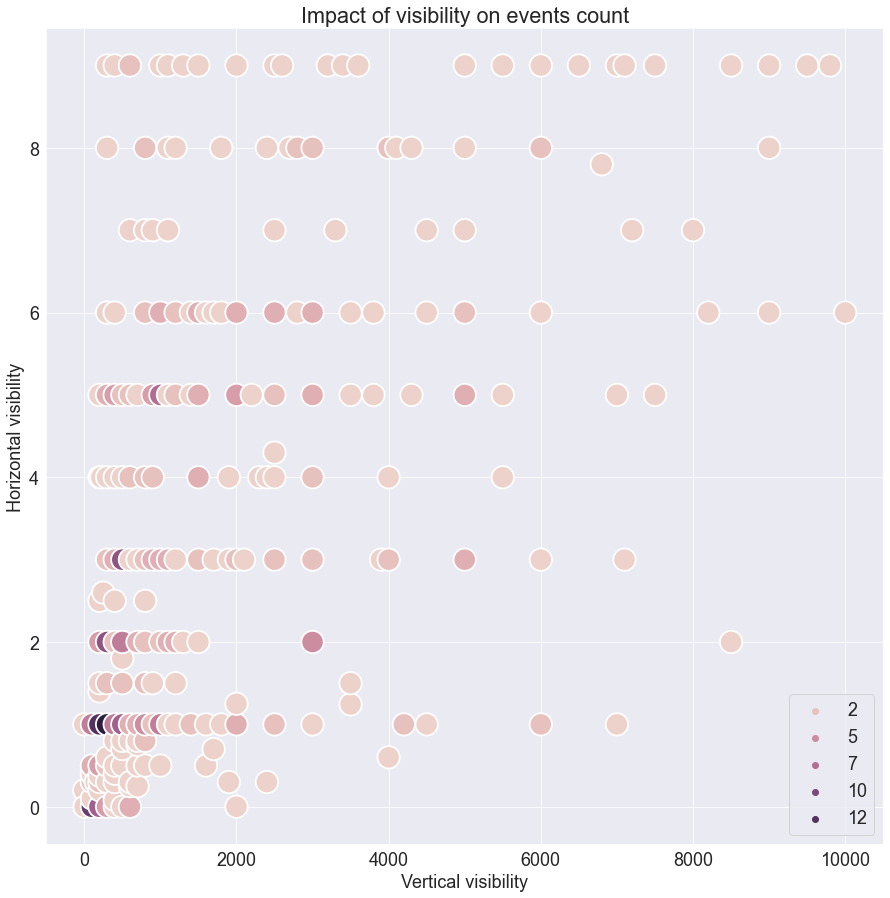

In [38]:
matplotlib.rcParams['figure.figsize'] = (15, 15)
data = occurence_df[occurence_df['VisibilyCeiling']<10000]
data = data[data['Visibility']<10]
data = data.groupby(['VisibilyCeiling','Visibility'])['OccNo'].count()
fig = sns.scatterplot(x ='VisibilyCeiling',y='Visibility', hue = data.values, data =data, s=500);
fig.set(xlabel = 'Vertical visibility', ylabel = 'Horizontal visibility', Title='Impact of visibility on events count');

Aviation accidents and incidents are more likely to happen in low visibility conditions. This conditions are usually refered to as **marginal** conditions and can change quickly. They affect mainly VFR (visual flight rules) aircraft that are not certified and equipped to fly IFR (instrument flight rules).  
Other weather phenomena have an impact of flight safety. The following plot is a breakdown of aviation events with respect to associated phenomenon (or multiple phenomena).

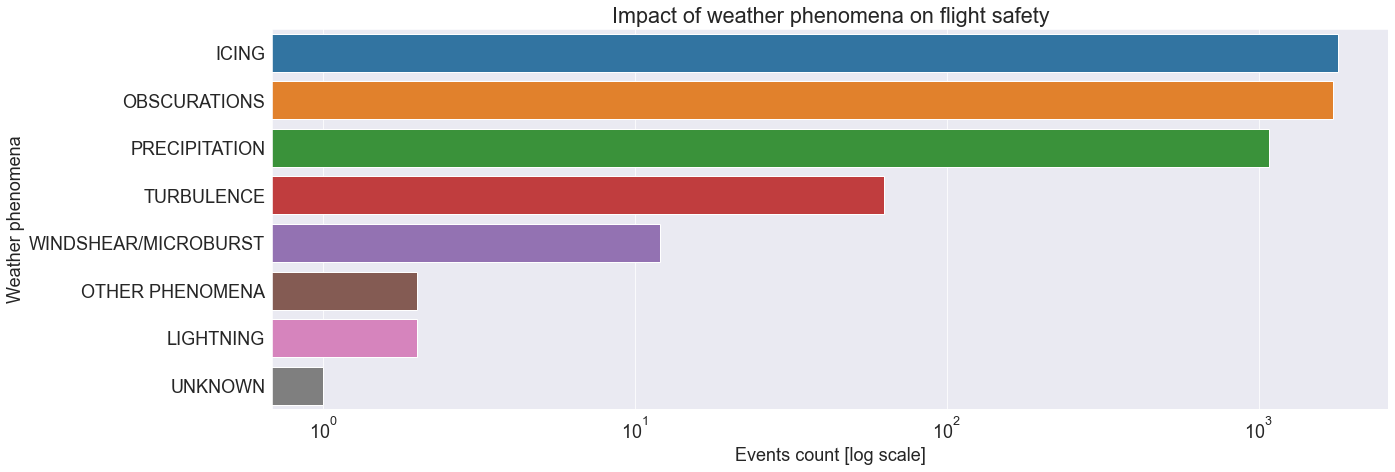

In [39]:
matplotlib.rcParams['figure.figsize'] = (20, 7)
column = 'WeatherPhenomenaTypeID_DisplayEng'
graph =  occurence_df_full.groupby(column)['OccNo'].count().sort_values(ascending=False)
fig = sns.barplot(graph.values, graph.index);
fig.set(xlabel = 'Events count [log scale]', ylabel = 'Weather phenomena', Title='Impact of weather phenomena on flight safety');
fig.set_xscale('log')

The top 3 weather conditions affecting aviation are **icing**, **obscuration** and **precipitation**. **Turbulence** is a very serious concern, especially when it is categorized as *moderate* or *severe*. Among the less recurrent but most dangerous phenomena are **windshear**, **Microburst** and **lightning**. These three conditions are difficult to forecast and can cause substantial damages in short time duration.  
  
Takeoff and landing are the most critical phases of any flight. Here is a breakdown of events associated with different categories of Takeoff and landing operations.

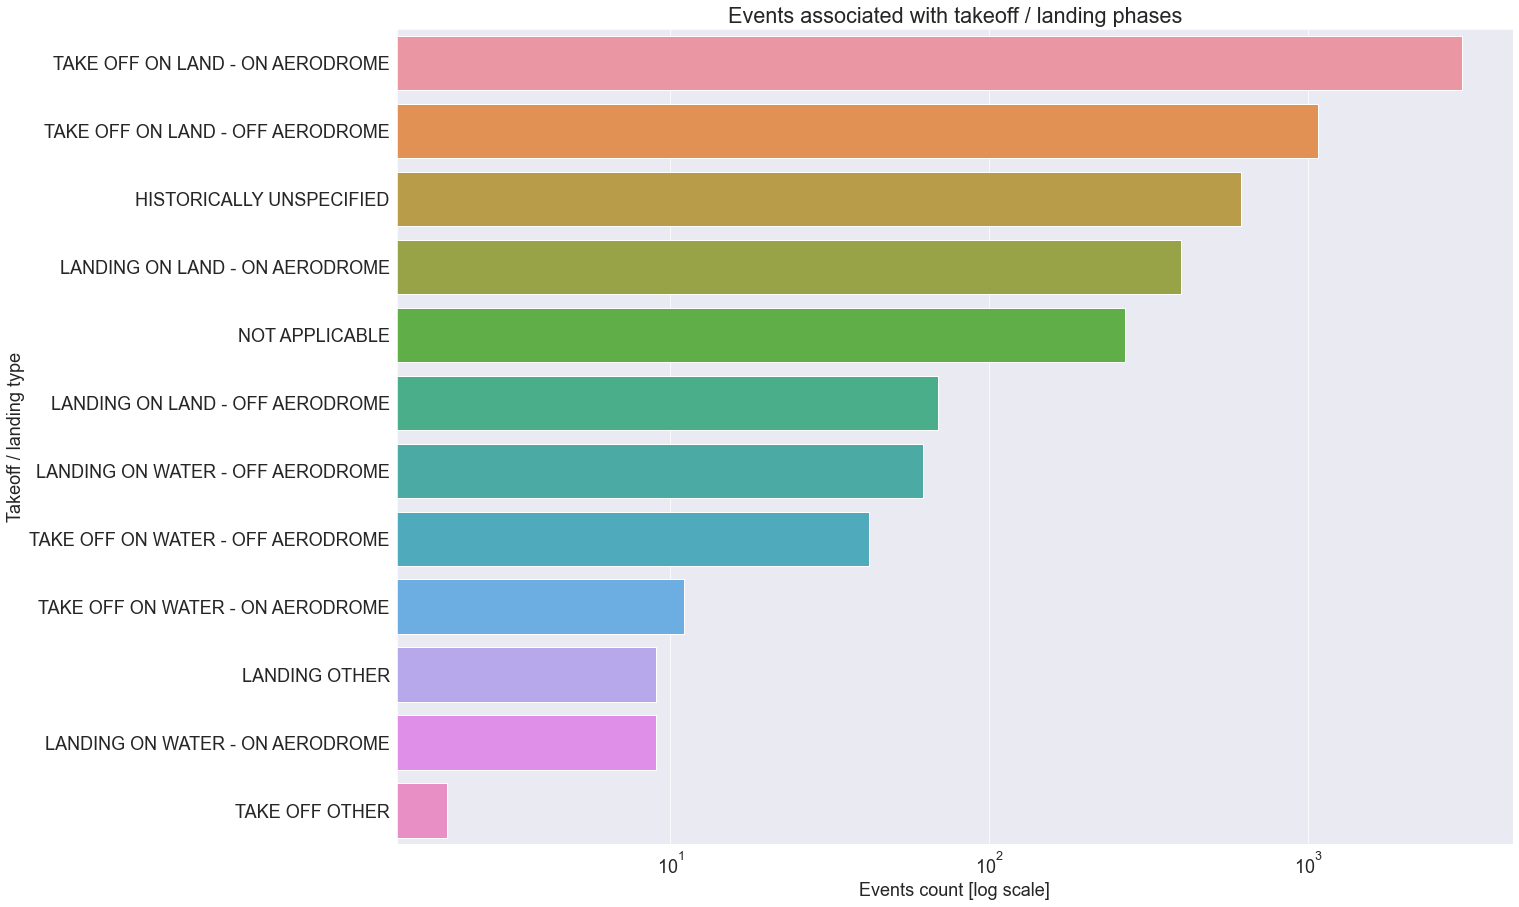

In [40]:
matplotlib.rcParams['figure.figsize'] = (20, 15)
column = 'TakeOffLandingTypeID_DisplayEng'
graph =  occurence_df.groupby(column)['OccNo'].count().sort_values(ascending=False)
fig = sns.barplot(graph.values, graph.index);
fig.set(xlabel = 'Events count [log scale]', ylabel = 'Takeoff / landing type', Title='Events associated with takeoff / landing phases');
fig.set_xscale('log')

When we talk about takeoff and landing operations, it is clear that the runway plays a key role. Runway surface can be described using two parameters : *surface condition* and *contamination*.

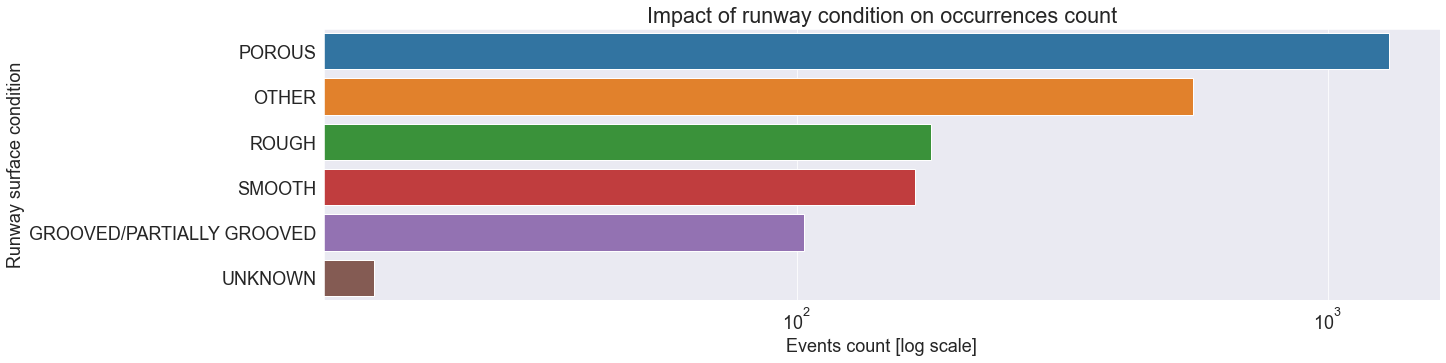

In [41]:
matplotlib.rcParams['figure.figsize'] = (20, 5)
column = 'RunwaySurfaceID_DisplayEng'
graph =  occurence_df.groupby(column)['OccNo'].count().sort_values(ascending=False)
fig = sns.barplot(graph.values, graph.index);
fig.set(xlabel = 'Events count [log scale]', ylabel = 'Runway surface condition', Title='Impact of runway condition on occurrences count');
fig.set_xscale('log')

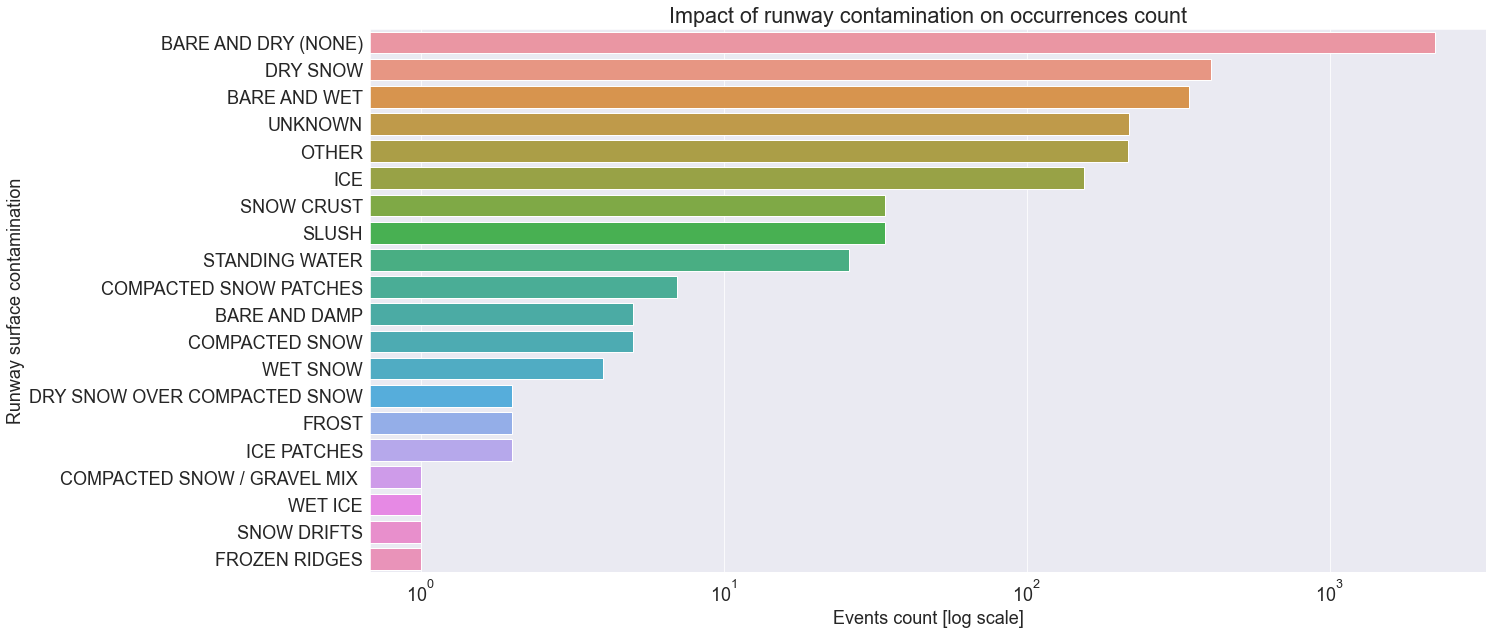

In [42]:
matplotlib.rcParams['figure.figsize'] = (20, 10)
column = 'SurfaceContaminationID_DisplayEng'
graph =  occurence_df_full.groupby(column)['OccNo'].count().sort_values(ascending=False)
fig = sns.barplot(graph.values, graph.index);
fig.set(xlabel = 'Events count [log scale]', ylabel = 'Runway surface contamination', Title='Impact of runway contamination on occurrences count');
fig.set_xscale('log')

Even if the contamination affects the runway operation, we can observe that a high number of events occur in *bare and dry* runways. In this case, events are caused by external factors (human, or equipment).  
  
Let's see if a specific aircraft manufacturer is more represented in the incident/accident database:

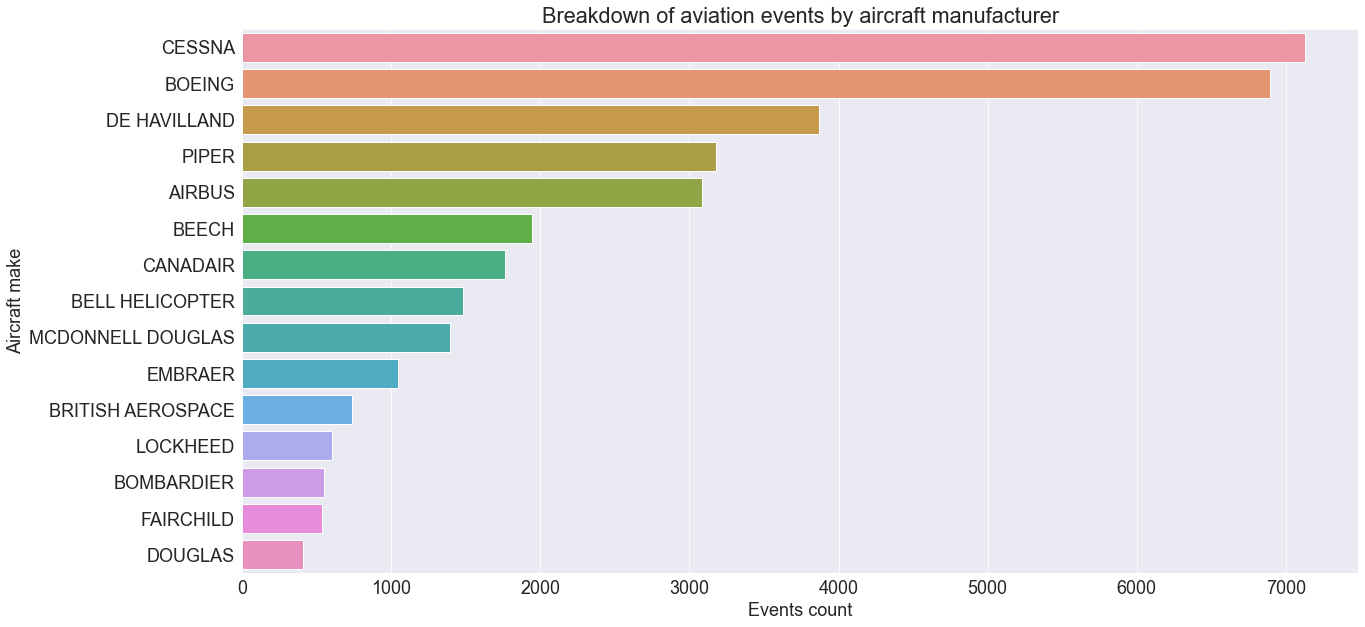

In [43]:
matplotlib.rcParams['figure.figsize'] = (20, 10)
column = 'AircraftMakeID_DisplayEng'
graph =  aircraft_df.groupby(column)['OccNo'].count().sort_values(ascending=False).head(15)
fig = sns.barplot(graph.values, graph.index);
fig.set(xlabel = 'Events count', ylabel = 'Aircraft make', Title='Breakdown of aviation events by aircraft manufacturer');

**Cessna** and **Piper** show among the top 5 makes. Most of aircraft manufactured by these two makes are light aircraft used for personal/tourism and training flights. Pilots flying these aircraft are less experienced in average. There are many occurrences invloving aircraft made by **Boeing**, **Airbus** and **De Havilland**. These aircraft are the most used by canadian commercial aviation.  

Aviation events are not reported only for airplanes, but for all types of aircraft. Here is a breakdown of events by aircraft types: 

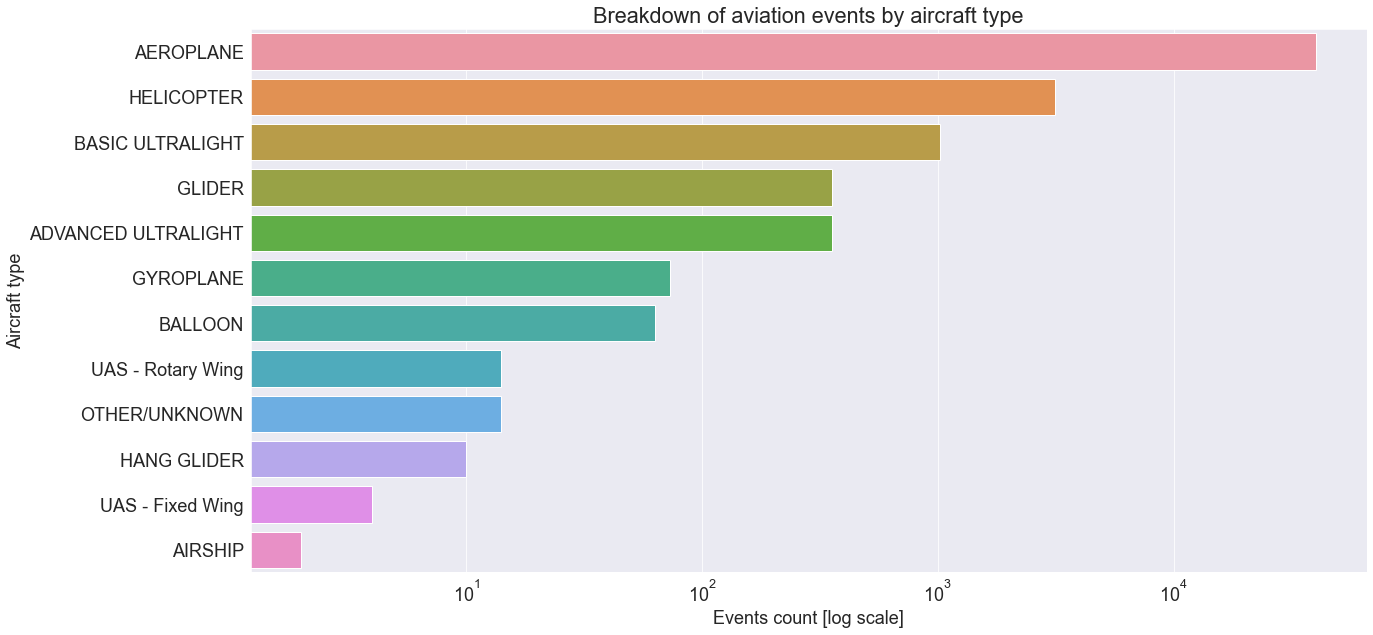

In [44]:
matplotlib.rcParams['figure.figsize'] = (20, 10)
column = 'AircraftTypeID_DisplayEng'
graph =  aircraft_df.groupby(column)['OccNo'].count().sort_values(ascending=False)
fig = sns.barplot(graph.values, graph.index);
fig.set(xlabel = 'Events count [log scale]', ylabel = 'Aircraft type', Title='Breakdown of aviation events by aircraft type');
fig.set_xscale('log')

Most of events are related to **airplanes** obviously, there are still a non neglectable amount of events happening with **helicopters, gliders**, and even **ballons** !  

Events can be classified as well, according to their operator type:

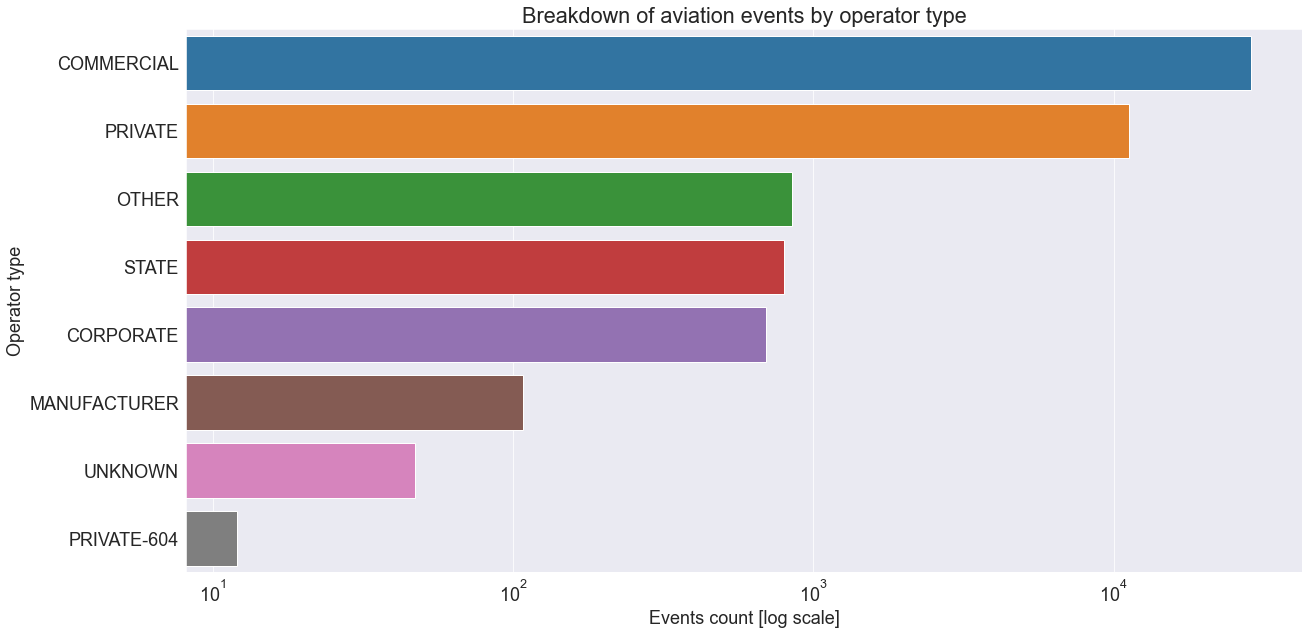

In [45]:
matplotlib.rcParams['figure.figsize'] = (20, 10)
column = 'OperatorTypeID_DisplayEng'
graph =  aircraft_df.groupby(column)['OccNo'].count().sort_values(ascending=False)
fig = sns.barplot(graph.values, graph.index);
fig.set(xlabel = 'Events count [log scale]', ylabel = 'Operator type', Title='Breakdown of aviation events by operator type');
fig.set_xscale('log')

**Commercial** flights report the highest number of events, due to more intense activity. **Private** flights are more related to tourism, and training activities.  
  

Aircraft are also categorized according to their weight. This is called the wake turbulence category, because it is associated to wake turbulence generated by aircraft. This parameter is used by air traffic control to establish spacing between different categories of aircraft in order to prevent this dangerous phenomenon.

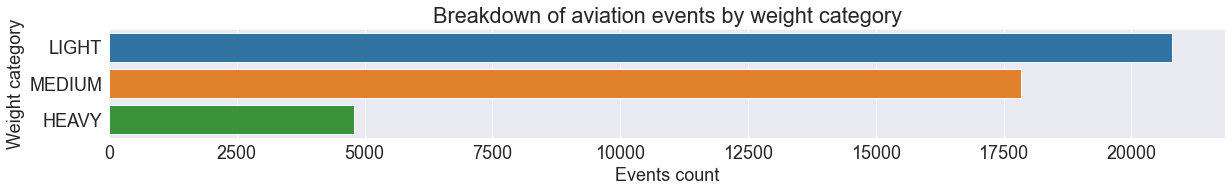

In [46]:
matplotlib.rcParams['figure.figsize'] = (20, 2)
column = 'WakeTurbulenceCategoryID_DisplayEng'
graph =  aircraft_df[aircraft_df[column]!='UNKNOWN'].groupby(column)['OccNo'].count().sort_values(ascending=False)
fig = sns.barplot(graph.values, graph.index);
fig.set(xlabel = 'Events count', ylabel = 'Weight category', Title='Breakdown of aviation events by weight category');

In the next section, we will determine the impact of the aircraft age on the events count. Using the `YearOfManuf` parameter, we will compute the age at the time of the event. First we have to prepare/clean the data.

In [47]:
def clean_YoM(txt):
    txt = str(txt)
    if len(txt)==4 and txt[0]!=' ':
        return int(txt)
    elif len(txt)==6:
        return int(txt[:-2])

column = 'YearOfManuf'
aircraft_df[column] = aircraft_df[column].apply(clean_YoM)

In [48]:
#we join the occurrence and aircraft datasets using the occurrence numbers.
new_dataset = aircraft_df.set_index('OccNo').join(occurence_df.set_index('OccNo'))
#compute the age
new_dataset['age'] = new_dataset['OccYear']-new_dataset['YearOfManuf']

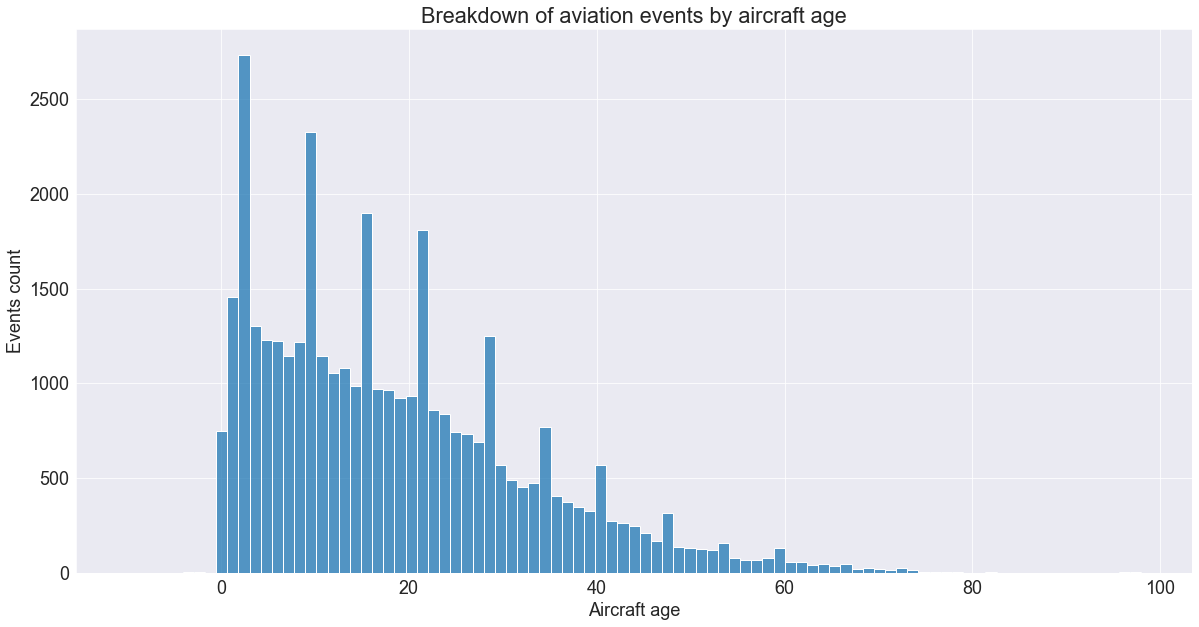

In [49]:
matplotlib.rcParams['figure.figsize'] = (20, 10)
column = 'age'
fig = sns.histplot(x = column, data = new_dataset);
fig.set(xlabel = 'Aircraft age', ylabel = 'Events count', Title='Breakdown of aviation events by aircraft age');

This histogram shows that -in general- incidents/accidents are not more frequent in old aircraft. This can be associated with two factors:  
- There are less old aircraft, so less events associated with this category.
- Airworthiness and strict maintenance programs.
  
Not all occurrences are associated with aircraft damage. The next plot shows a breakdown by damage level.

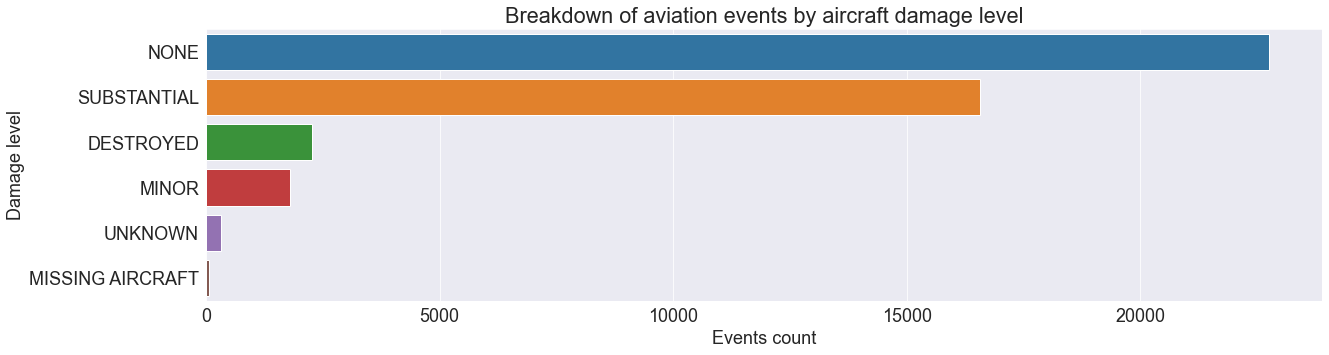

In [50]:
matplotlib.rcParams['figure.figsize'] = (20, 5)
column = 'DamageLevelID_DisplayEng'
graph =  aircraft_df.groupby(column)['OccNo'].count().sort_values(ascending=False)
fig = sns.barplot(graph.values, graph.index);
fig.set(xlabel = 'Events count', ylabel = 'Damage level', Title='Breakdown of aviation events by aircraft damage level');

Most of events caused no damage. It turns out that, if an aircraft is damaged during an event, it is more likely that the damage is substantial.  
  
  
Flight plans are required in some cases (IFR, VFR cross border, etc). They contain useful data about the flight originating airport, route, destination airport, altitude and aircraft type. They contain also contact informations and search and rescue time. 

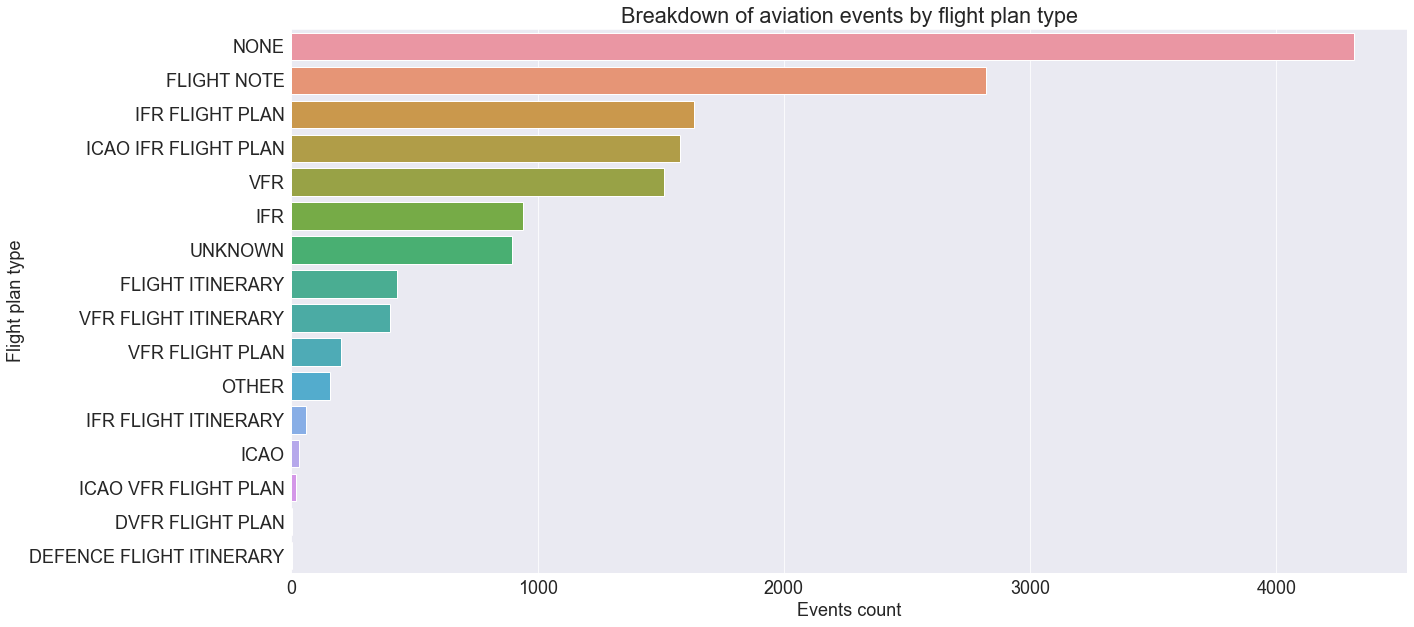

In [51]:
matplotlib.rcParams['figure.figsize'] = (20, 10)
column = 'FlightPlanTypeID_DisplayEng'
graph =  aircraft_df.groupby(column)['OccNo'].count().sort_values(ascending=False)
fig = sns.barplot(graph.values, graph.index);
fig.set(xlabel = 'Events count', ylabel = 'Flight plan type', Title='Breakdown of aviation events by flight plan type');

The top-two categories of flights involved in events are flights without flight plan, or *flight notes*, where the pilot is responsible of search and rescue. Furthermore, we can prove that the average fatal injuries count is *higher* than flights with regular flight plans.

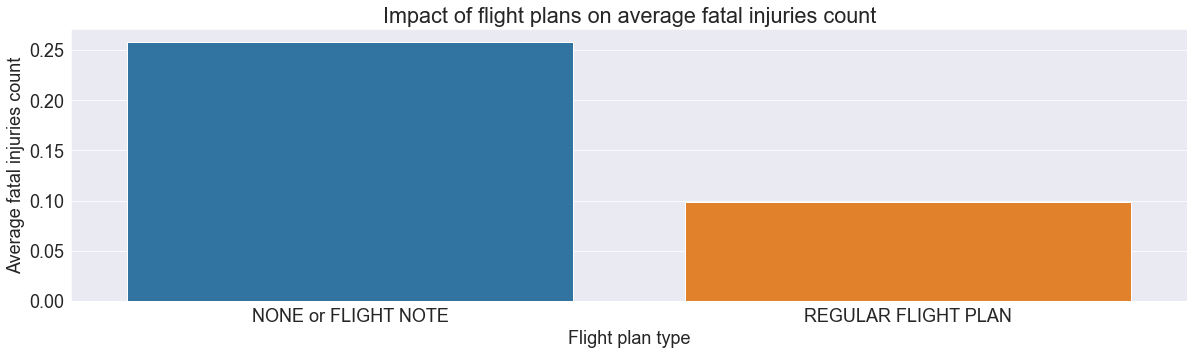

In [65]:
mean_fatal_no_fp = new_dataset.loc[(new_dataset['FlightPlanTypeID_DisplayEng']=='NONE')|(new_dataset['FlightPlanTypeID_DisplayEng']=='FLIGHT NOTE')]['TotalFatalCount'].mean()

mean_fatal_with_fp = new_dataset.loc[(new_dataset['FlightPlanTypeID_DisplayEng']!='NONE')&(new_dataset['FlightPlanTypeID_DisplayEng']!='FLIGHT NOTE')]['TotalFatalCount'].mean()
matplotlib.rcParams['figure.figsize'] = (20, 5)
fig = sns.barplot(['NONE or FLIGHT NOTE','REGULAR FLIGHT PLAN'],[mean_fatal_no_fp,mean_fatal_with_fp]);
fig.set(xlabel = 'Flight plan type', ylabel = 'Average fatal injuries count', Title='Impact of flight plans on average fatal injuries count');

There are several types of flight operations. The next plot shows the breakdown of events by operation type.

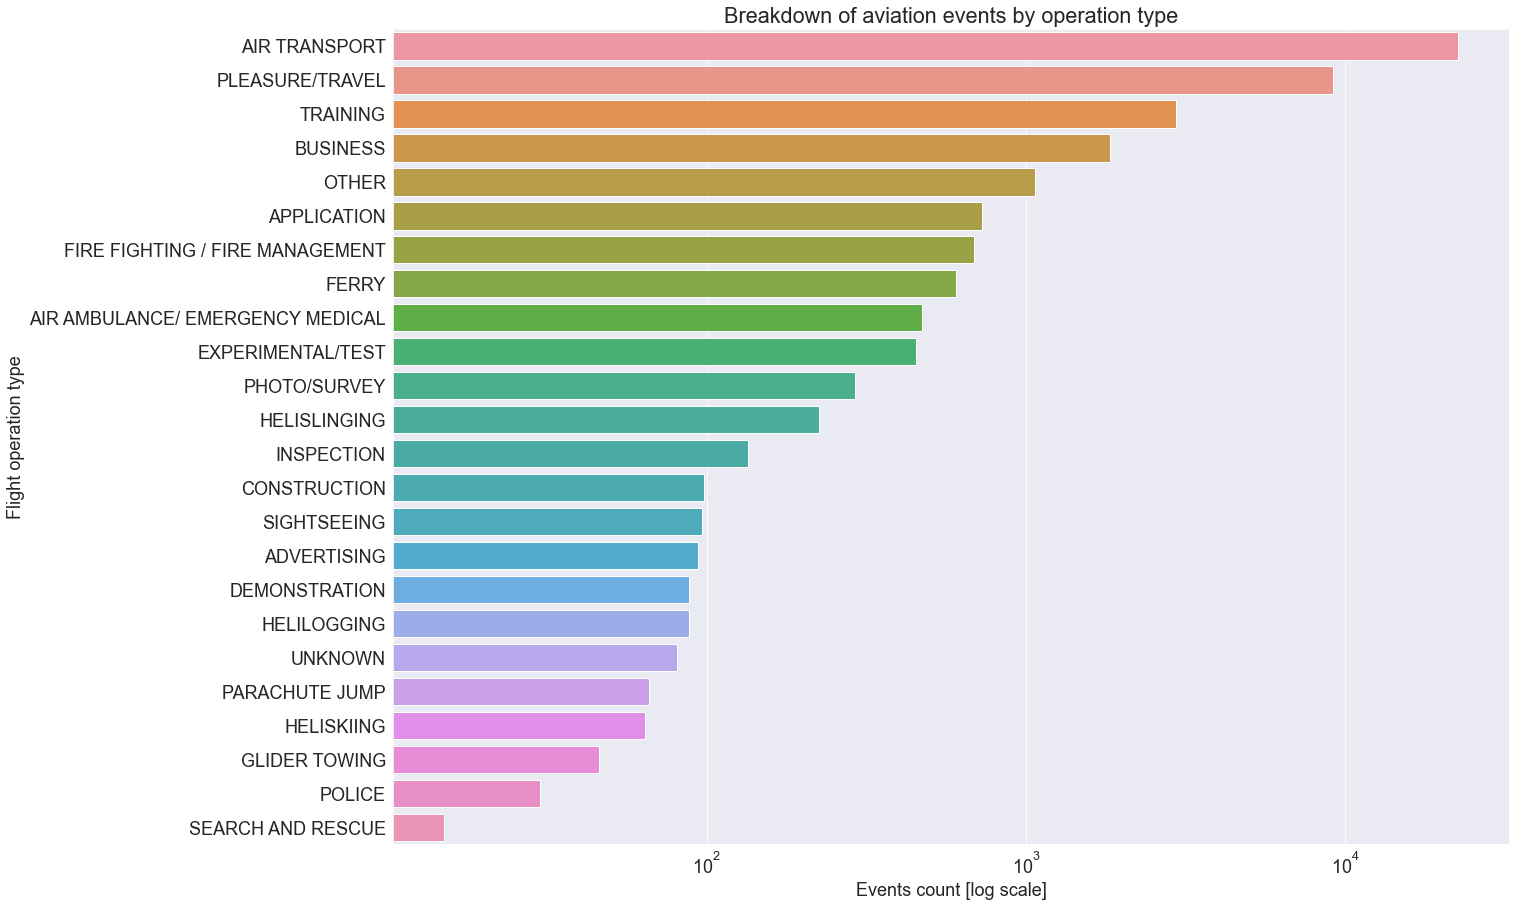

In [67]:
matplotlib.rcParams['figure.figsize'] = (20, 15)
column = 'OperationTypeID_DisplayEng'
graph =  aircraft_df.groupby(column)['OccNo'].count().sort_values(ascending=False)
fig = sns.barplot(graph.values, graph.index);
fig.set(xlabel = 'Events count [log scale]', ylabel = 'Flight operation type', Title='Breakdown of aviation events by operation type');
fig.set_xscale("log");

The majority of events happen during air transport operations and pleasure/travel flights. This is expected, as these two categories represent the most common air operations.  
  
In the next section, we consider the **Air Traffic Service (ATS)** impact on aviation occurrences. First, let's show which ATS are involved.

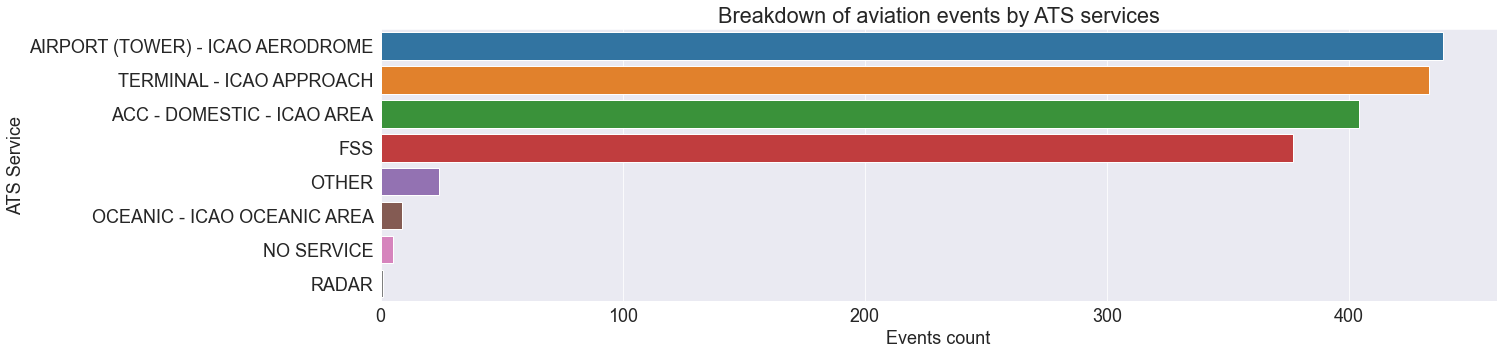

In [69]:
matplotlib.rcParams['figure.figsize'] = (20, 5)
column = 'AtsServiceID_DisplayEng'
graph =  aircraft_df.groupby(column)['OccNo'].count().sort_values(ascending=False)
fig = sns.barplot(graph.values, graph.index);
fig.set(xlabel = 'Events count', ylabel = 'ATS Service', Title='Breakdown of aviation events by ATS services');

By looking at the events count, we can clearly see that the number of events associated with ATS is marginal (less than 2000 out of 45000 events). The distribution is more or less balanced between the main categories of ATS services.  
Traffic advisory is offered by ATS in general, or by air-air communication (between pilots). It can be generated by onboard equipment ACAS (Airborn Collision Avoidance System). Unfortunatly, this valuable information is not reported in most of occurrences reports. Nevertheless, we still have some data to show.  

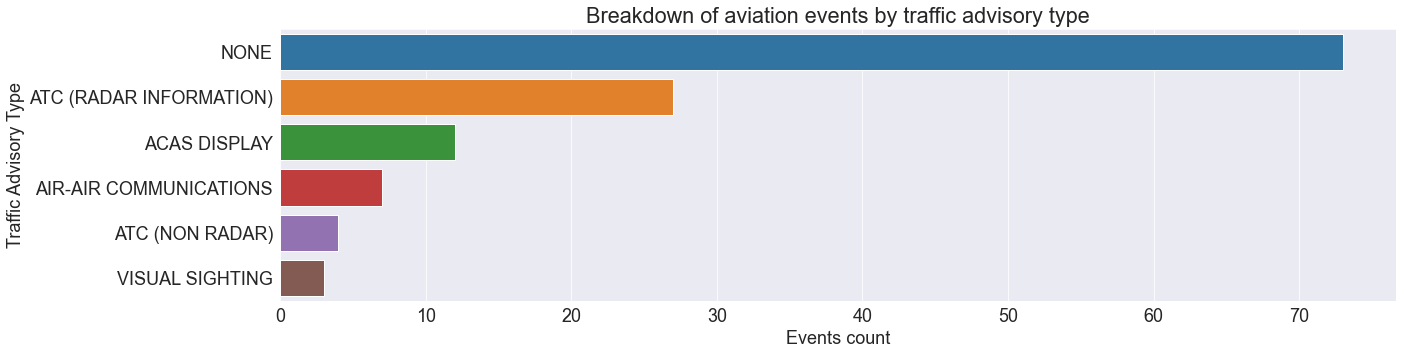

In [71]:
matplotlib.rcParams['figure.figsize'] = (20, 5)
column = 'TrafficAdvisoryTypeID_DisplayEng'
graph =  aircraft_df[aircraft_df[column]!='UNKNOWN'].groupby(column)['OccNo'].count().sort_values(ascending=False)
fig = sns.barplot(graph.values, graph.index);
fig.set(xlabel = 'Events count', ylabel = 'Traffic Advisory Type', Title='Breakdown of aviation events by traffic advisory type');

Evacuation time plays a significant role in search and rescue operations. In the following plot, we show a breakdown of reported evacuation times.

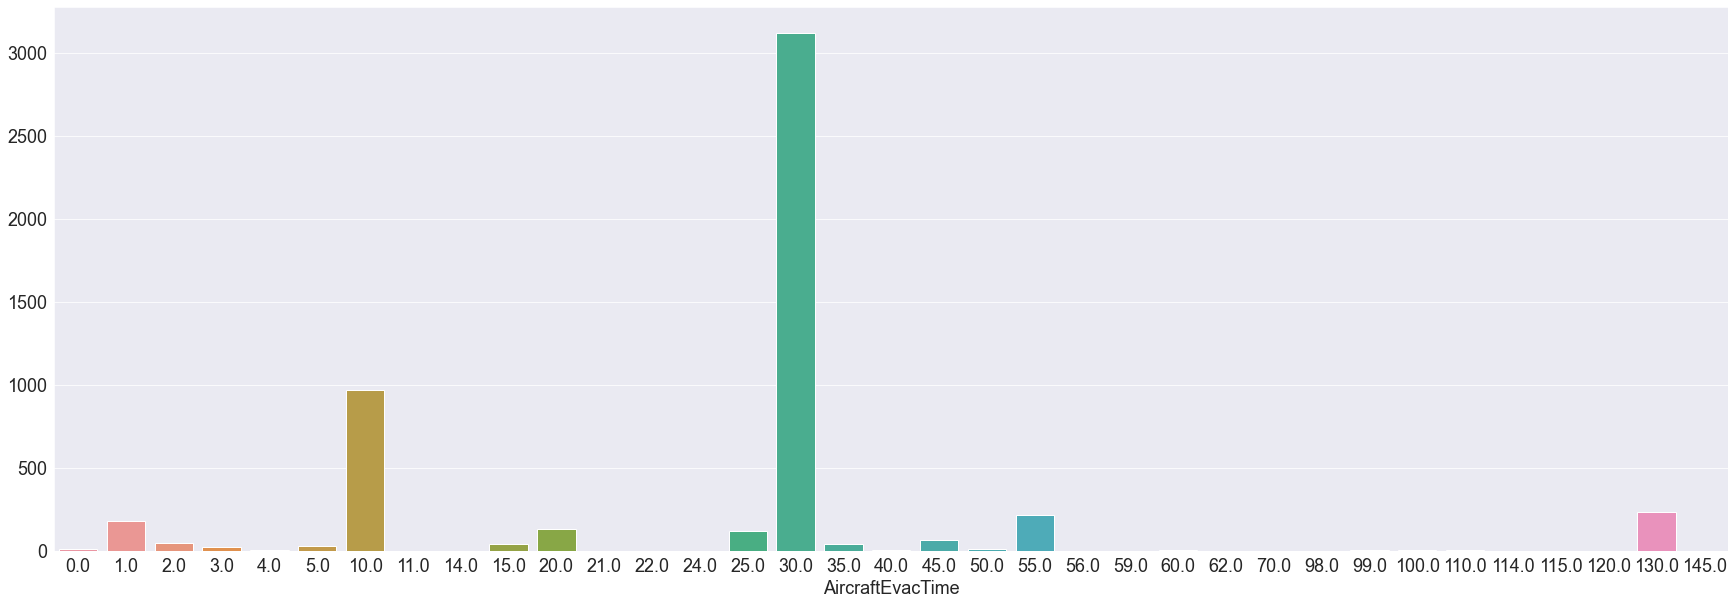

In [95]:
matplotlib.rcParams['figure.figsize'] = (30, 10)
column = 'AircraftEvacTime'
data = survivability_df[survivability_df[column]<150].groupby(column).OccNo.count()
sns.barplot(x = data.index, y = data.values);
fig.set(xlabel = 'Evacuation time (minutes)', ylabel = 'Events count', Title='Breakdown of aviation events by evacuation time');

In [136]:
new_dataset2 = occurence_df.set_index('OccNo').join(survivability_df.set_index('OccNo').drop(survivability_df.columns[0],axis = 1))
new_dataset2['AircraftEvacTimeCat'] = pd.cut(new_dataset2['AircraftEvacTime'], bins = [0,5,15,30,np.inf])

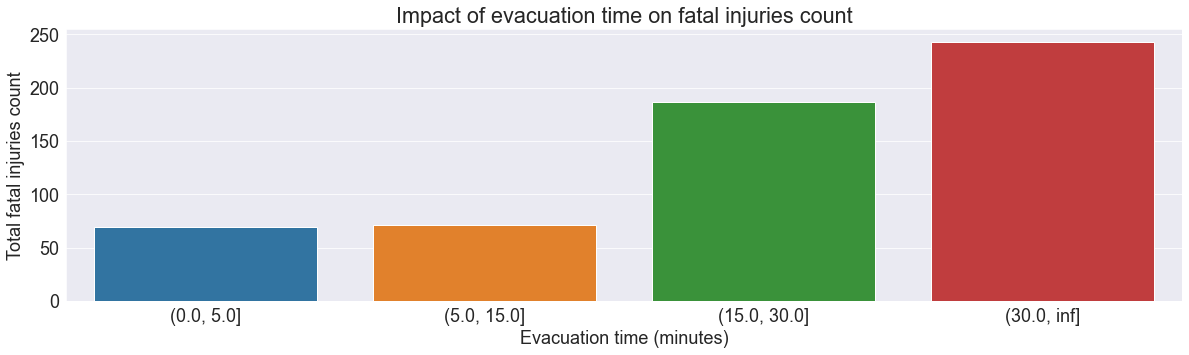

In [151]:

matplotlib.rcParams['figure.figsize'] = (20, 5)
column = 'AircraftEvacTimeCat'
data = new_dataset2.groupby(column)['TotalFatalCount'].sum()
fig = sns.barplot(x = data.index, y = data.values);
fig.set(xlabel = 'Evacuation time (minutes)', ylabel = 'Total fatal injuries count', Title='Impact of evacuation time on fatal injuries count');

As we might expect, the evacuation time influence the fatal injuries count. More fatal injuries happen in situations where it takes longer to proceed with evacuation.

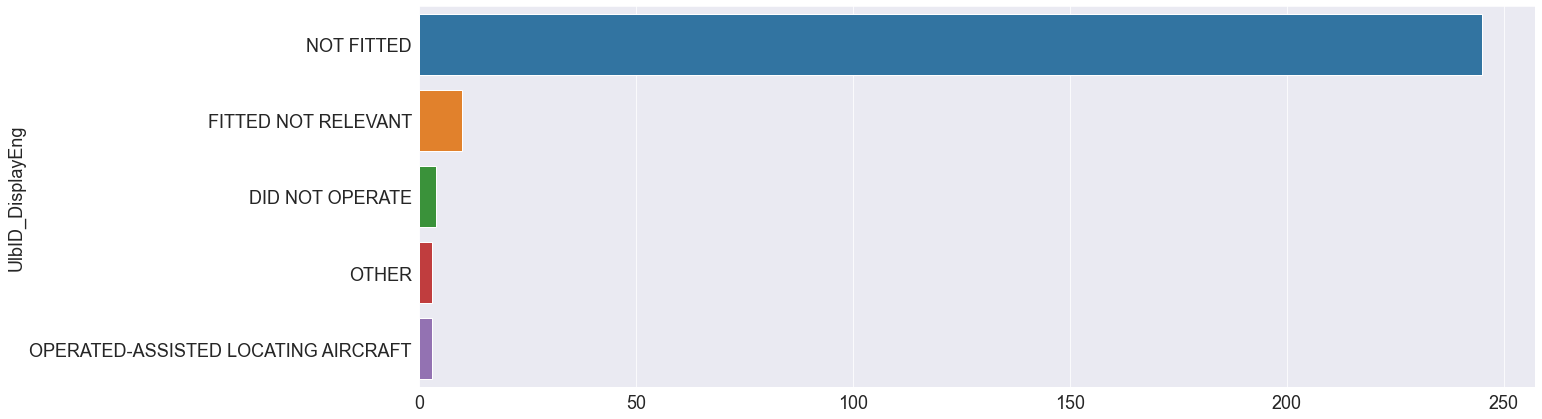

In [119]:
matplotlib.rcParams['figure.figsize'] = (20, 7)
column = 'UlbID_DisplayEng'
graph =  survivability_df[survivability_df[column]!='UNKNOWN'].groupby(column)['OccNo'].count().sort_values(ascending=False)
fig = sns.barplot(graph.values, graph.index);

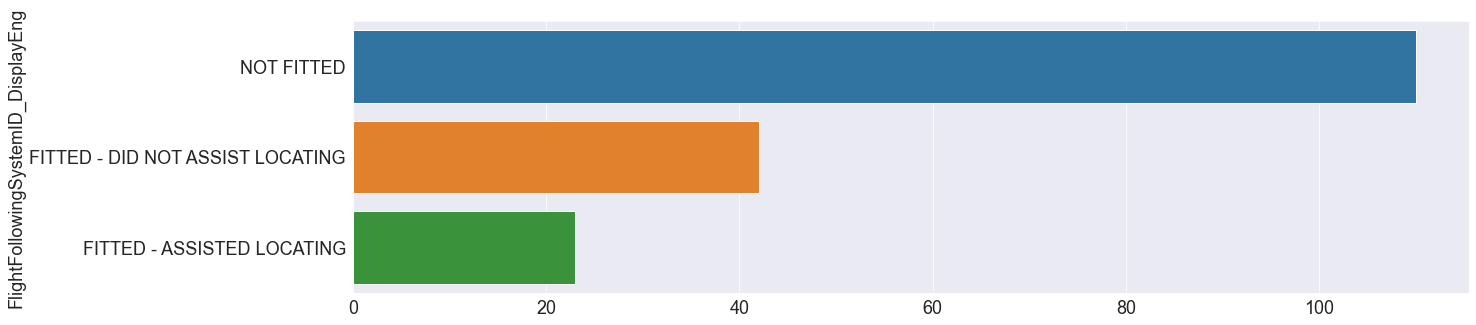

In [120]:
matplotlib.rcParams['figure.figsize'] = (20, 5)
column = 'FlightFollowingSystemID_DisplayEng'
graph =  survivability_df[survivability_df[column]!='UNKNOWN'].groupby(column)['OccNo'].count().sort_values(ascending=False)
fig = sns.barplot(graph.values, graph.index);

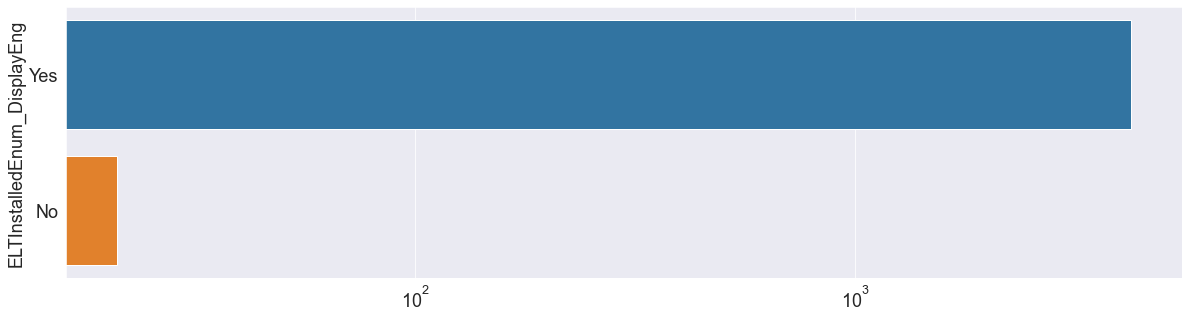

In [123]:
matplotlib.rcParams['figure.figsize'] = (20, 5)
column = 'ELTInstalledEnum_DisplayEng'
graph =  survivability_df[survivability_df[column]!='Unknown'].groupby(column)['OccNo'].count().sort_values(ascending=False)
fig = sns.barplot(graph.values, graph.index);
fig.set_xscale("log");

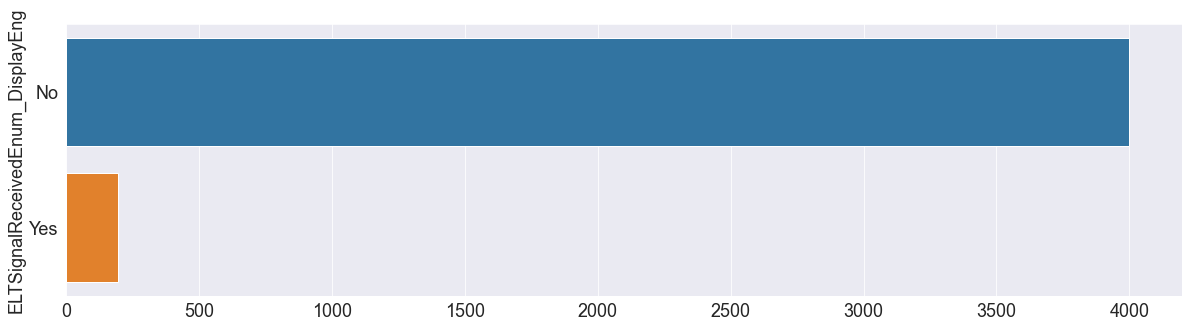

In [124]:
matplotlib.rcParams['figure.figsize'] = (20, 5)
column = 'ELTSignalReceivedEnum_DisplayEng'
graph =  survivability_df[survivability_df[column]!='Unknown'].groupby(column)['OccNo'].count().sort_values(ascending=False)
fig = sns.barplot(graph.values, graph.index);

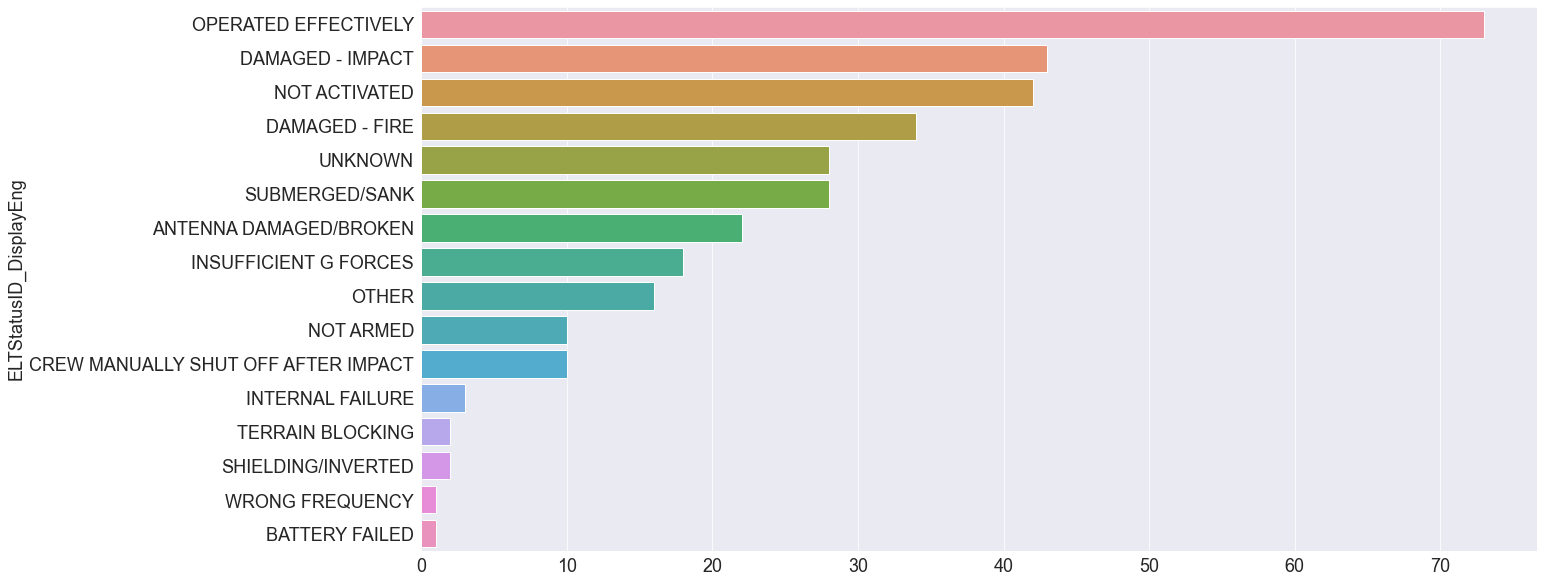

In [126]:
matplotlib.rcParams['figure.figsize'] = (20, 10)
column = 'ELTStatusID_DisplayEng'
graph =  survivability_df.groupby(column)['OccNo'].count().sort_values(ascending=False)
fig = sns.barplot(graph.values, graph.index);

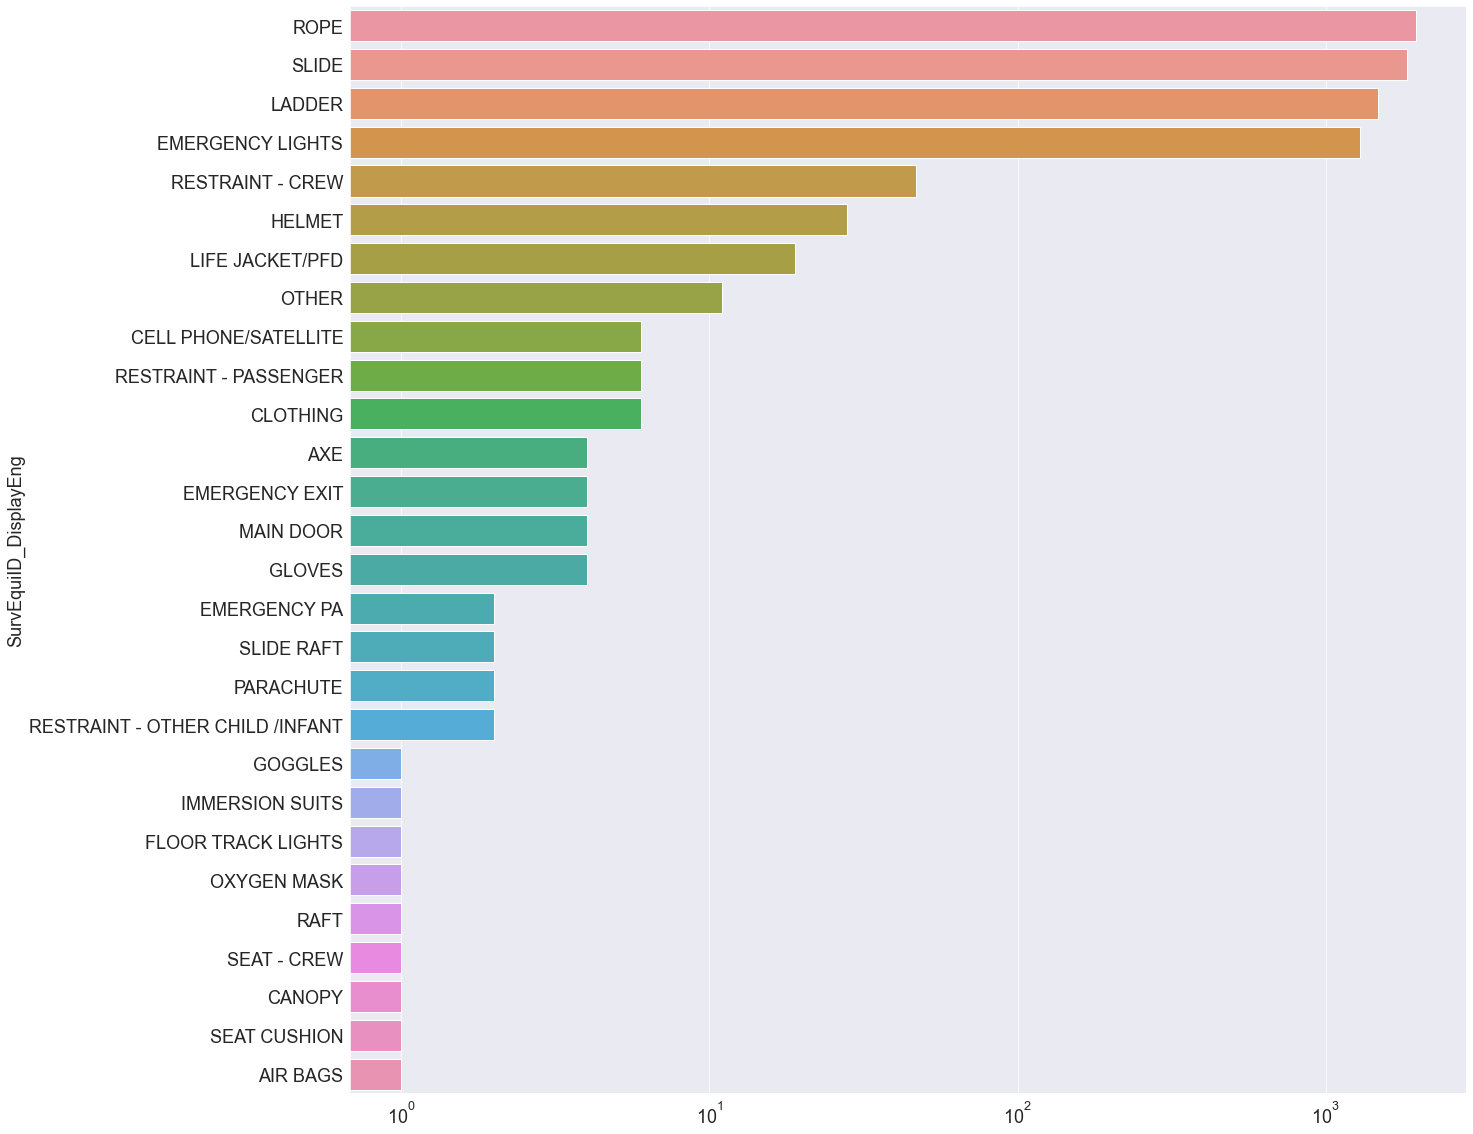

In [127]:
matplotlib.rcParams['figure.figsize'] = (20, 20)
column = 'SurvEquiID_DisplayEng'
graph =  survivability_df.groupby(column)['OccNo'].count().sort_values(ascending=False)
fig = sns.barplot(graph.values, graph.index);
fig.set_xscale("log");

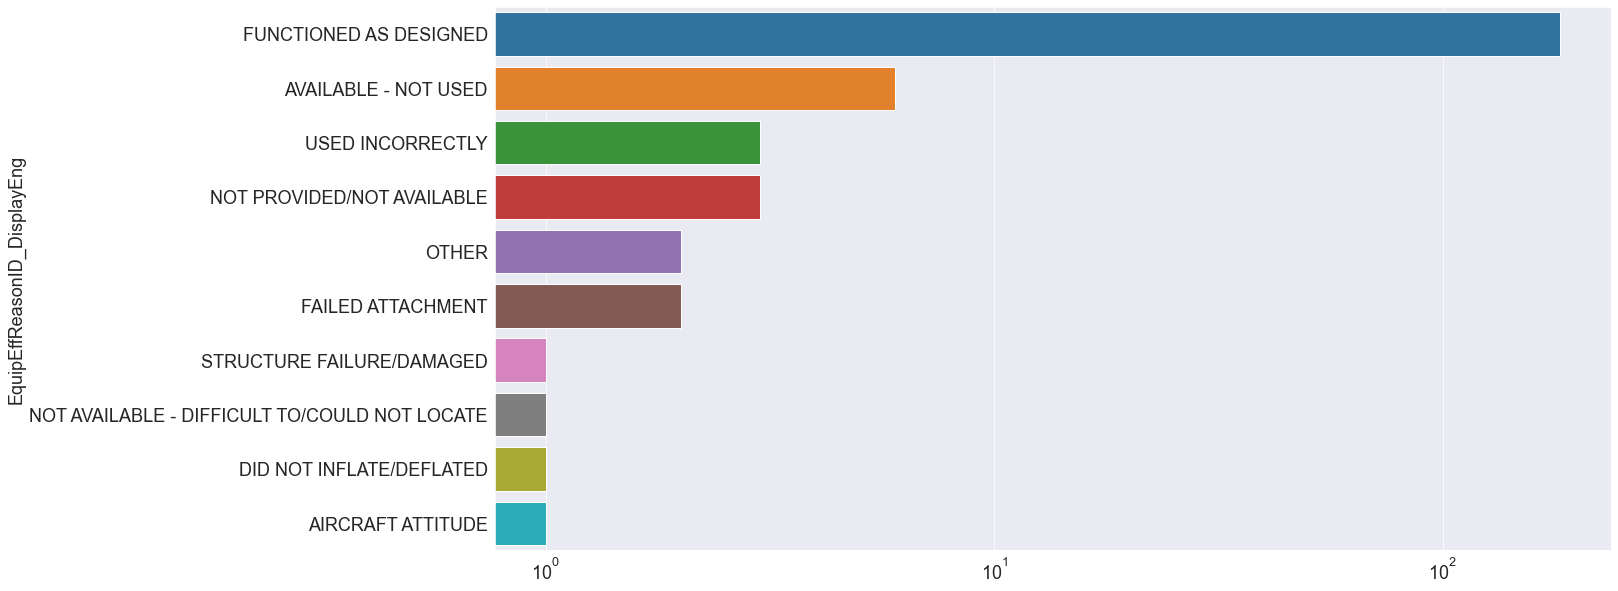

In [128]:
matplotlib.rcParams['figure.figsize'] = (20, 10)
column = 'EquipEffReasonID_DisplayEng'
graph =  survivability_df[survivability_df[column]!='UNKNOWN'].groupby(column)['OccNo'].count().sort_values(ascending=False)
fig = sns.barplot(graph.values, graph.index);
fig.set_xscale("log");

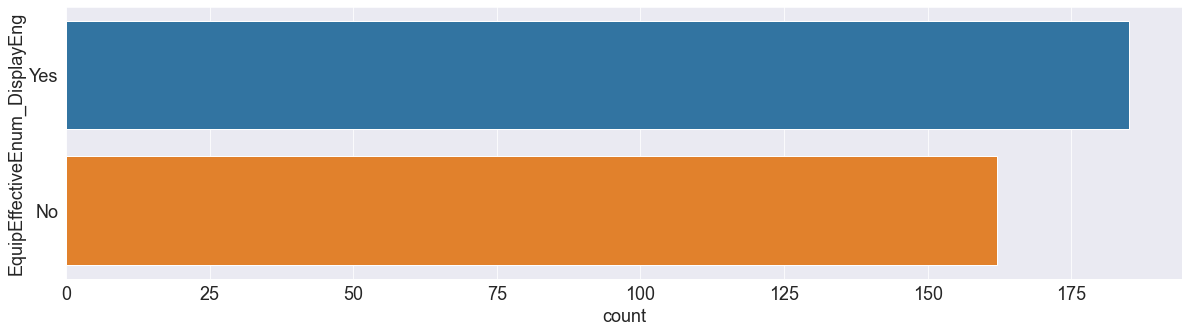

In [129]:
matplotlib.rcParams['figure.figsize'] = (20, 5)
column = 'EquipEffectiveEnum_DisplayEng'
fig = sns.countplot(y=column,data = survivability_df[survivability_df[column]!='Unknown'].dropna(subset=[column]));

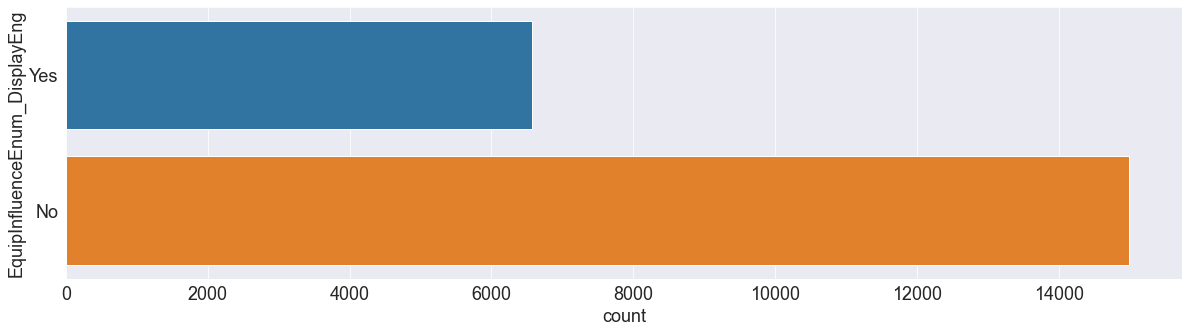

In [130]:
matplotlib.rcParams['figure.figsize'] = (20, 5)
column = 'EquipInfluenceEnum_DisplayEng'
survivability_df[column] = survivability_df.fillna({column:'No'})[column]
fig = sns.countplot(y=column,data = survivability_df[survivability_df[column]!='Unknown'].dropna(subset=[column]));

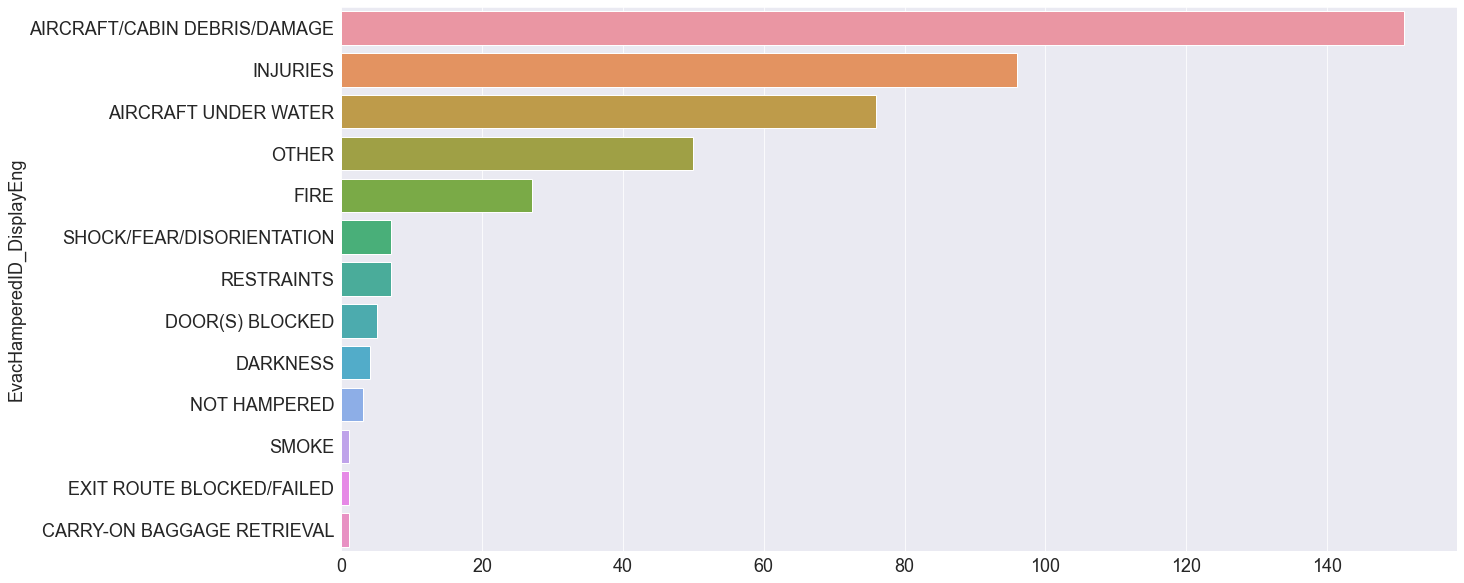

In [131]:
matplotlib.rcParams['figure.figsize'] = (20, 10)
column = 'EvacHamperedID_DisplayEng'
graph =  survivability_df[survivability_df[column]!='UNKNOWN'].groupby(column)['OccNo'].count().sort_values(ascending=False)
fig = sns.barplot(graph.values, graph.index);

## References
### Columns descriptions :  
 **EvacHamperedID_DisplayEng**  : The reason(s) why the evacuation was hampered, if applicable, in English. <br>
 **TimeZoneID_DisplayEng**  : The time zone used for reporting the time of occurrence, in English. <br>
 **FullPhaseDescEng**  : An algorithm-generated text string describing the phase in detail, in English. <br>
 **UlbID_DisplayEng**  : Indicates whether the underwater locator beacon was installed, operated, and/or relevant to the occurrence, in English. <br>
 **OtherAircraftSightedEnum_DisplayEng**  : Indicates whether the other aircraft was sighted by the specific aircraft involved (Yes/No/Wrong aircraft), in English. <br>
 **AircraftModelID_DisplayEng**  : The aircraft model, in English. <br>
 **SkyCondID_DisplayEng**  : The sky conditions at the time of the occurrence, in English. <br>
 **TakeOffLandingTypeID_DisplayEng**  : The type of takeoff and landing area associated with the occurrence, in English. <br>
 **OrganizationID_DisplayEng**  : The name of the organization (if the operator is an organization), in English. <br>
 **InjuriesEnum_DisplayEng**  : Indicates whether there were any injuries related to the occurrence, including ground injuries, in English. <br>
 **ELTSignalReceivedEnum_DisplayEng**  : Indicates whether an ELT signal was received, if known, in English. <br>
 **ELTStatusID_DisplayEng**  : A description of the ELT status, in English. <br>
 **SeriousIncidentEnum_DisplayEng**  : Indicates whether the occurrence was a serious incident as defined by ICAO in Annex 13, in English. Indicator: Yes/No. <br>
 **InjuryCategoryID_DisplayEng**  : A description of the injury category (crew/passengers/ground), in English.
Note: Injury count for crew/passengers/ground are stored in separate entries. <br>
 **VisibilyCeiling**  : The visibility ceiling, in feet. <br>
 **FlightPhaseID_DisplayEng**  : The flight phase when fire or smoke is initiated, in English. <br>
 **Unknown_MissingCount**  : The number of people who are missing or whose location is unknown for the associated occurrence/occurrence aircraft. <br>
 **ICAO_DisplayEng**  : The International Civil Aviation Organization (ICAO) occurrence category, in English.
For one occurrence, multiple ICAO categories may be assigned, that will generate multiple entries/rows. <br>
 **AircraftMakeID_DisplayEng**  : The aircraft make, in English. <br>
 **AircraftTypeID_DisplayEng**  : The aircraft type as defined in the Canadian Aviation Regulations, Part 1, Subpart 1. <br>
 **EvasiveActionByATSEnum_DisplayEng**  : Indicates whether evasive action was instructed by the air traffic service (ATS), if known, in English. <br>
 **OccTime**  : The time the occurrence happened. Time format is hh:mm (24-hour clock). <br>
 **FlightPlanTypeID_DisplayEng**  : The type of flight plan, in English. <br>
 **SurvEquiID_DisplayEng**  : The survival equipment available on the occurrence aircraft, if relevant, in English.
Equipment grid - Multiple survival equipments can be assigned to an occurrence (OccID). Each equipment will result in a separate entry. <br>
 **OccTypeID_DisplayEng**  : A description of the occurrence type (accident/incident reportable), in English. <br>
 **RegistrationNo**  : The registration number of the occurrence aircraft. <br>
 **OccDate**  : The occurrence date. Date format is YYYY-MM-DD. <br>
 **TotalSeriousCount**  : The total number of serious injuries (includes any ground injuries). <br>
 **WeatherPhenomenaTypeID_DisplayEng**  : The type of weather phenomena at the time of the occurrence, in English.
Weather phenomena grid - Multiple weather phenomenas can be specified for each occurrence (OccID), each type and its associated description will appear as a separate entry. <br>
 **EvacEgressIssueEnum_DisplayEng**  : Indicates whether there were evacuation egress issues, if known, in English. <br>
 **DepartAirportID_AirportName**  : The name of the departure airport, if applicable. <br>
 **Latitude**  : Latitude of the occurrence or airport location <br>
 **TotalNoneCount**  : The total number of people not injured (aircraft occupants only). <br>
 **ICAO**  : The International Civil Aviation Organization (ICAO) 4-letter airport code. <br>
 **InflightIcingCondEnum_DisplayEng**  : Indicates whether in-flight icing conditions existed, if known, in English. <br>
 **FlightNo**  : Flight Number of the Specific Aircraft Involved (AcID) <br>
 **AirportID_CountryID_DisplayEng**  : The country in which the airport is located, in English. <br>
 **DamageLevelID_DisplayEng**  : The aircraft level of damage as defined by ICAO, in English. <br>
 **SurvivableEnum_DisplayEng**  : Indicates whether the occurrence was survivable (for occurrences involving an impact), in English. Indicator: Yes/No/Unknown. <br>
 **AmateurBuildIND**  : Indicates whether the aircraft was amateur-built. <br>
 **DestAirportID_AirportName**  : The name of the destination airport, if applicable.  <br>
 **WakeTurbulenceCategoryID_DisplayEng**  : The wake turbulence category of the occurrence aircraft, as defined by the Canadian Aviation Regulations, Standard 821 -Canadian Domestic Air Traffic Control Separation, in English. <br>
 **LightCondID_DisplayEng**  : A description of the light conditions, in English. <br>
 **EvasiveActionByPilotEnum_DisplayEng**  : Indicates whether evasive action was taken by the pilot, if known, in English. <br>
 **PhaseID_DisplayEng**  : The phase of the flight, in English.
Note: Multiple phases can be assigned to each occurrence (OccID) or specific aircraft (AcID) and each will have an associated EventID. <br>
 **OccNo**  : The unique occurrence number for general reference. <br>
 **RunwaySurfaceID_DisplayEng**  : The texture of the surface of the runway involved in the occurrence, in English. <br>
 **ICAODepart**  : The International Civil Aviation Organization (ICAO) identification for the airport, aerodrome, or heliport of the intended takeoff. <br>
 **OccRegionID_DisplayEng**  : The region of the occurrence, as defined by the geographical area each regional office has been assigned, in English. <br>
 **FlightFollowingSystemID_DisplayEng**  : Indicates whether a flight following system (a type of onboard aircraft position tracking system) was installed, and whether it provided any assistance to locating the aircraft (English) <br>
 **AircraftEvacTime**  : The duration of the aircraft evacuation, in minutes. <br>
 **TotalFatalCount**  : The total number of fatalities (includes any ground fatalities). <br>
 **CountryID_DisplayEng**  : The country of the occurrence, in English. <br>
 **OccIncidentTypeID_DisplayEng**  : If the occurrence is a reportable incident, the type of incident as defined in the Transportation Safety Board Regulations, Part 1, Subparagraph 2(1)(b), in English. <br>
 **OperatorTypeID_DisplayEng**  : The type of operator (private, commercial, state) involved in the occurrence, in English. <br>
 **SeriousCount**  : The number of serious injuries associated to the occurrence or occurrence aircraft. <br>
 **EquipEffReasonID_DisplayEng**  : The reason for survival equipment effectiveness, in English. <br>
 **ELTInstalledEnum_DisplayEng**  : Indicates whether an emergency locator transmitter (ELT) was installed on the occurrence aircraft, if known, in English. <br>
 **EquipEffectiveEnum_DisplayEng**  : Indicates whether equipment was effective and corresponds to the survival equipment, if known, in English. <br>
 **SurfaceContaminationID_DisplayEng**  : The type of surface contamination, if relevant, in English.
Note: Each description will result in a separate entry. <br>
 **AtsServiceID_DisplayEng**  : The air traffic service (ATS) provided in Canada or by an international equivalent, in English. <br>
 **YearOfManuf**  : The year in which the aircraft was manufactured. <br>
 **AirportID_ProvinceID_DisplayEng**  : The province or the state in which the airport is located, in Canada or the United States respectively, in English.  <br>
 **TotalMinorCount**  : The total number of minor injuries (includes any ground injuries). <br>
 **WeightWithinLimitsEnum_DisplayEng**  : Indicates whether the actual aircraft weight was within limits at the time of the occurrence, in English. Indicator: Yes/No/Unknown <br>
 **ICAODestination**  : The International Civil Aviation Organization (ICAO) identification for the airport, aerodrome, or heliport of the intended landing. <br>
 **MinorCount**  : The number of minor injuries for associated occurrence/occurrence aircraft. <br>
 **ReportedByID_DisplayEng**  : The name of the organization or entity that reported the occurrence, in English. <br>
 **Temperature**  : The temperature at the time of the occurrence, in degrees Celsius by default. <br>
 **FullEventDescEng**  : An algorithm-generated text string describing the full event, in English. <br>
 **DangerousGoodEnum_DisplayEng**  : Indicates whether there were dangerous goods on board the occurrence aircraft, if known, in English. <br>
 **AtsUnitName**  : The air traffic service (ATS) unit name. <br>
 **TrafficAdvisoryTypeID_DisplayEng**  : The type of traffic advisory issued at the time of the occurrence, in English. <br>
 **GeneralWeatherID_DisplayEng**  : Indicates whether the known weather conditions were conducive to visual or instrument flight rules, in English. <br>
 **AtsUnitInvolvedEnum_DisplayEng**  : Indicates whether an air traffic service (ATS) unit was involved, in English. <br>
 **LandingGearID_DisplayEng**  : The type of landing gear on the aircraft, in English. <br>
 **AtsTypeID_DisplayEng**  : The air traffic service (ATS) type description, in English. <br>
 **Visibility**  : The visibility, in statute miles. <br>
 **OperationTypeID_DisplayEng**  : The type of operation performed at the time of the occurrence, in English. <br>
 **NumberOfEngine**  : The number of engines installed on the aircraft. <br>
 **TotalUnknownCount**  : The total number of people whose status is unknown (aircraft occupants only). <br>
 **NoneCount**  : The number of non injuries for the associated occurrence/occurrence aircraft. <br>
 **Location**  : The location of the occurrence <br>
 **FatalCount**  : The number of fatalities for the associated occurrence/occurrence aircraft. <br>
 **Longitude**  : Longitude of the occurrence or airport location <br>
 **RegCountryID_DisplayEng**  : The country of registration of the occurrence aircraft, in English. <br>
 **EventID_DisplayEng**  : A description of the event, in English. <br>
 **EquipInfluenceEnum_DisplayEng**  : Indicates whether the equipment influenced the survivability of the occurrence, if known, in English.